In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
import sys
sys.path.insert(0, "C:/workspace/data-science//libs")

from uniswap_v2_tools import show_swaps_count_moving_averages, show_reserves_time_distribution, show_reserve_price_distributions,\
                                show_swaps_amount_in_moving_averages, calc_price_and_increase_rates, increase_rate_moving_averages,\
                                    swaps_price_change_rates_moving_averages, pyplot_line_swap_change_rate, pyplot_line_swap_prices,\
                                        get_df_with_swap_prices_and_change_rates

In [2]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# DOG/WETH

In [9]:
dog_weth_df = pd.read_pickle(os.getcwd() + '\\pkl_stories\\dog_weth_swaps.pkl')
dog_weth_mints_df = pd.read_pickle(os.getcwd() + "\\pkl_stories\\dog_weth_mints.pkl")
dog_weth_burns_df = pd.read_pickle(os.getcwd() + "\\pkl_stories\\dog_weth_burns.pkl")
dog_weth_reserves_df = pd.read_pickle(os.getcwd() + "\\pkl_stories\\dog_weth_reserves.pkl")

In [4]:
print((dog_weth_df.timestamp[0] - dog_weth_df.timestamp[len(dog_weth_df) - 1]).days)

-103


C:\Users\Zbook\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


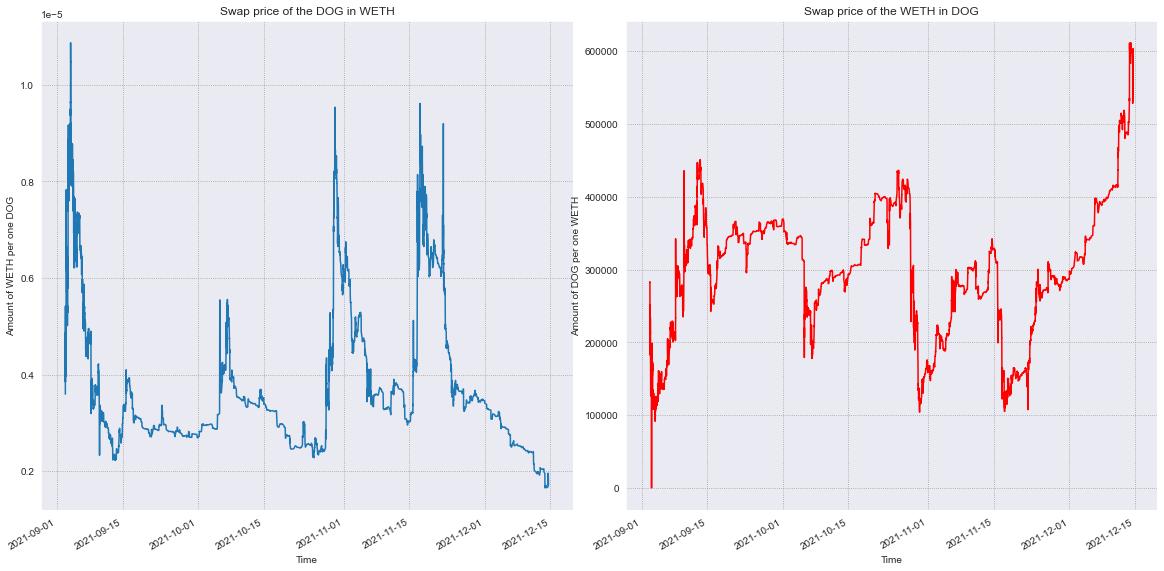

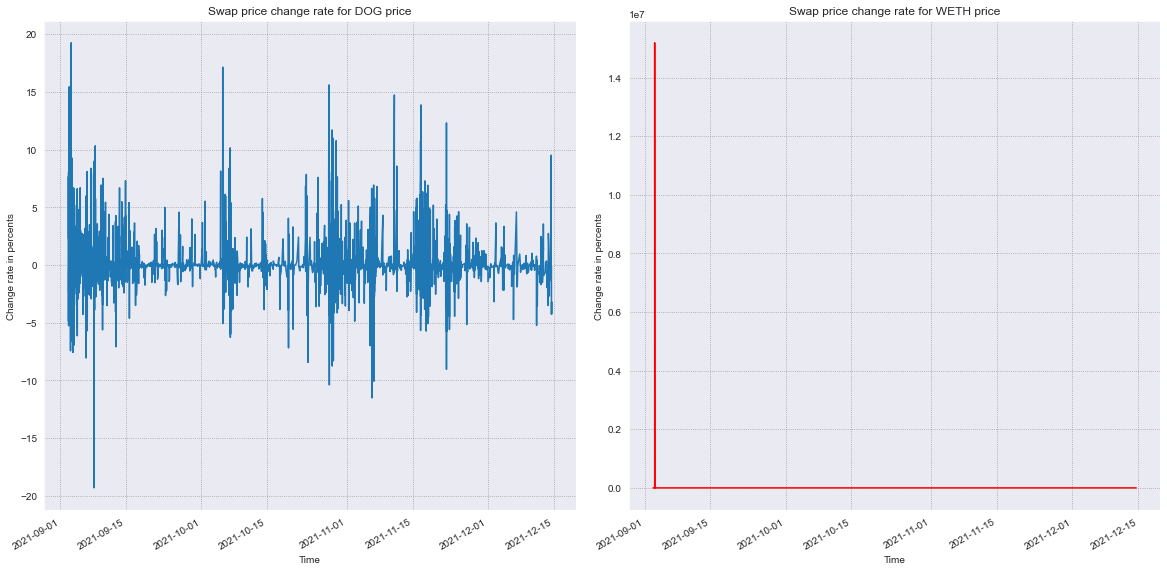

C:/workspace/data-science//libs\uniswap_v2_tools.py:235: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
C:/workspace/data-science//libs\uniswap_v2_tools.py:242: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)


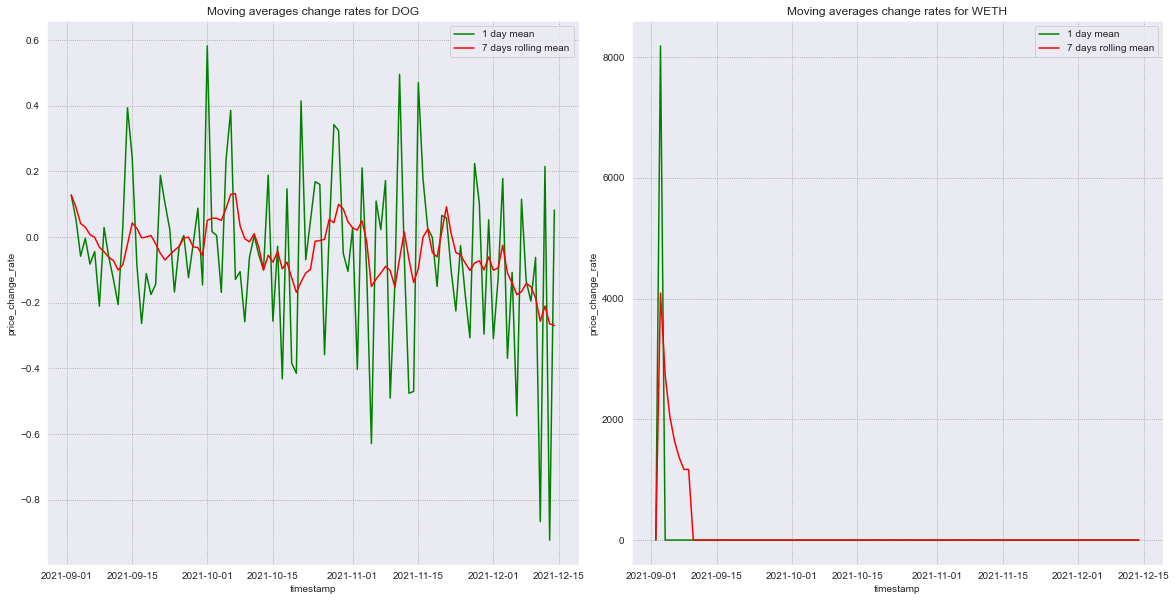

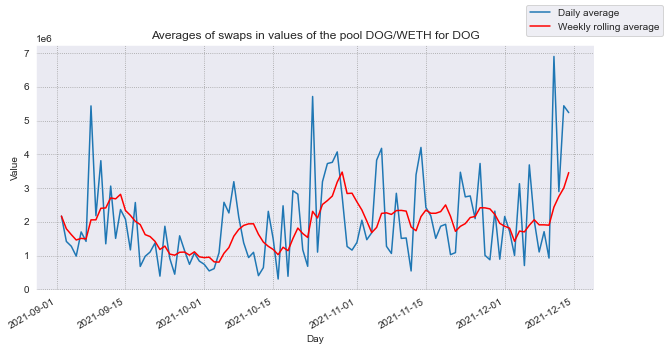

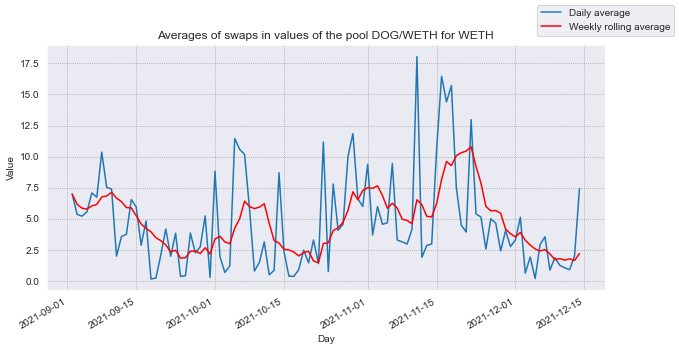

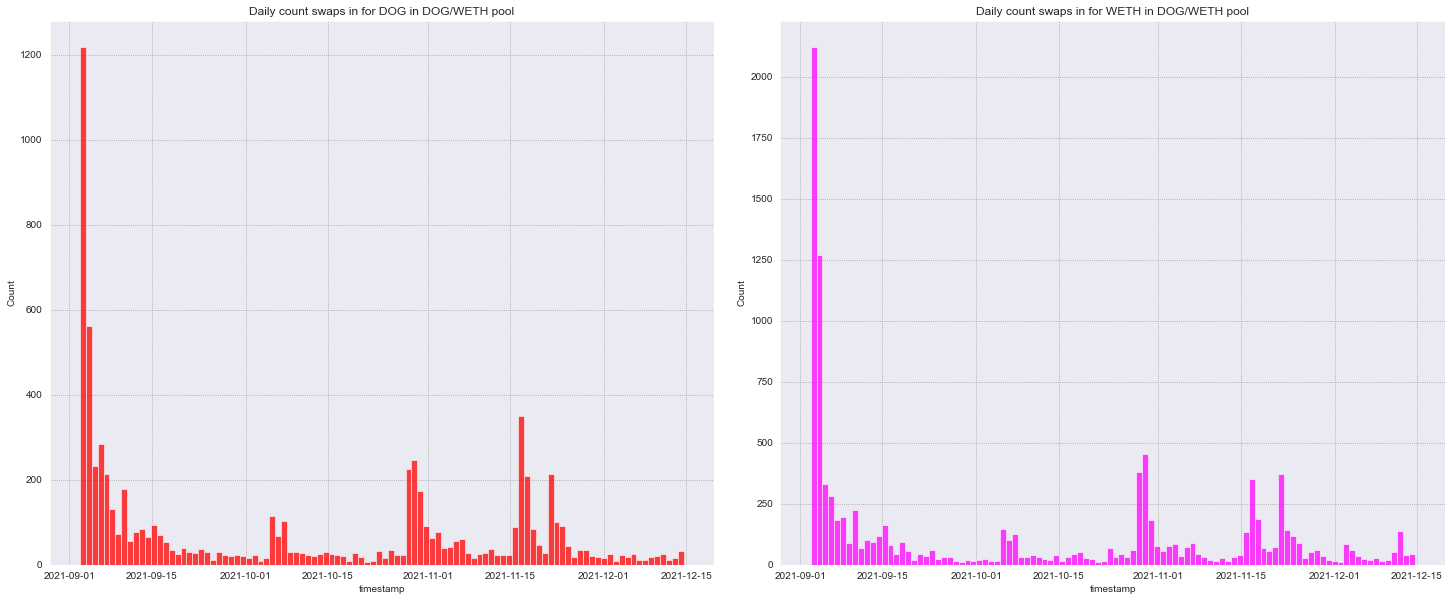

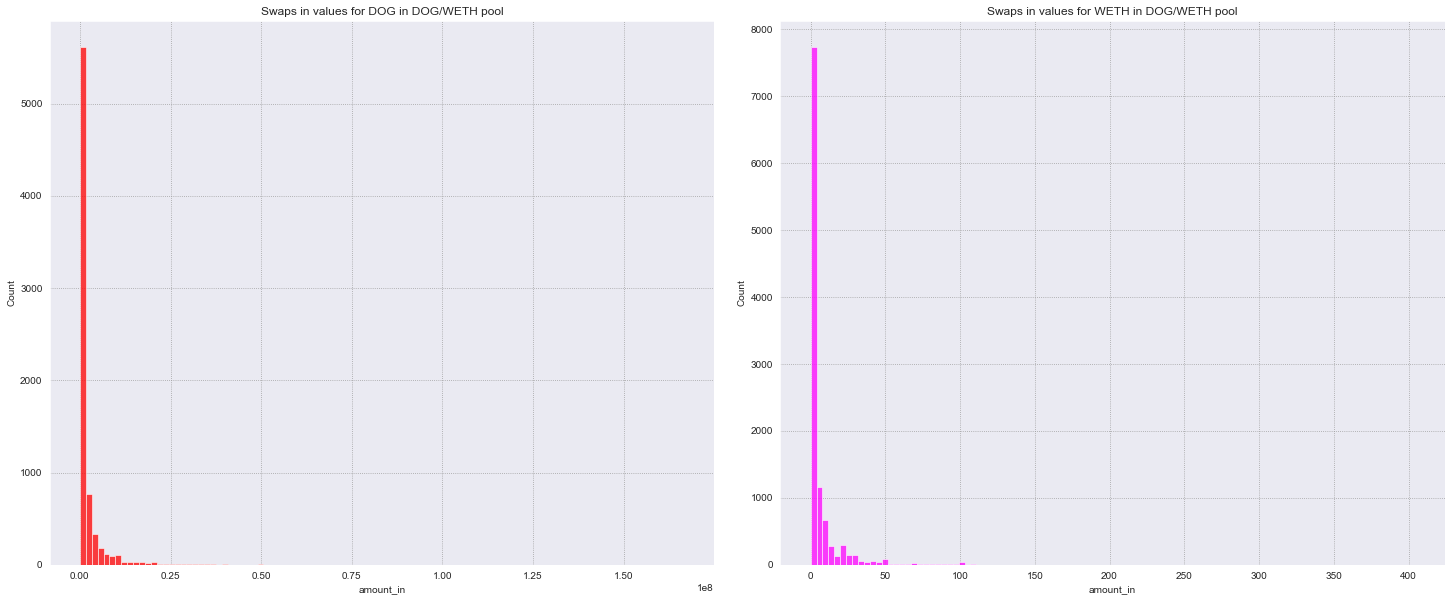

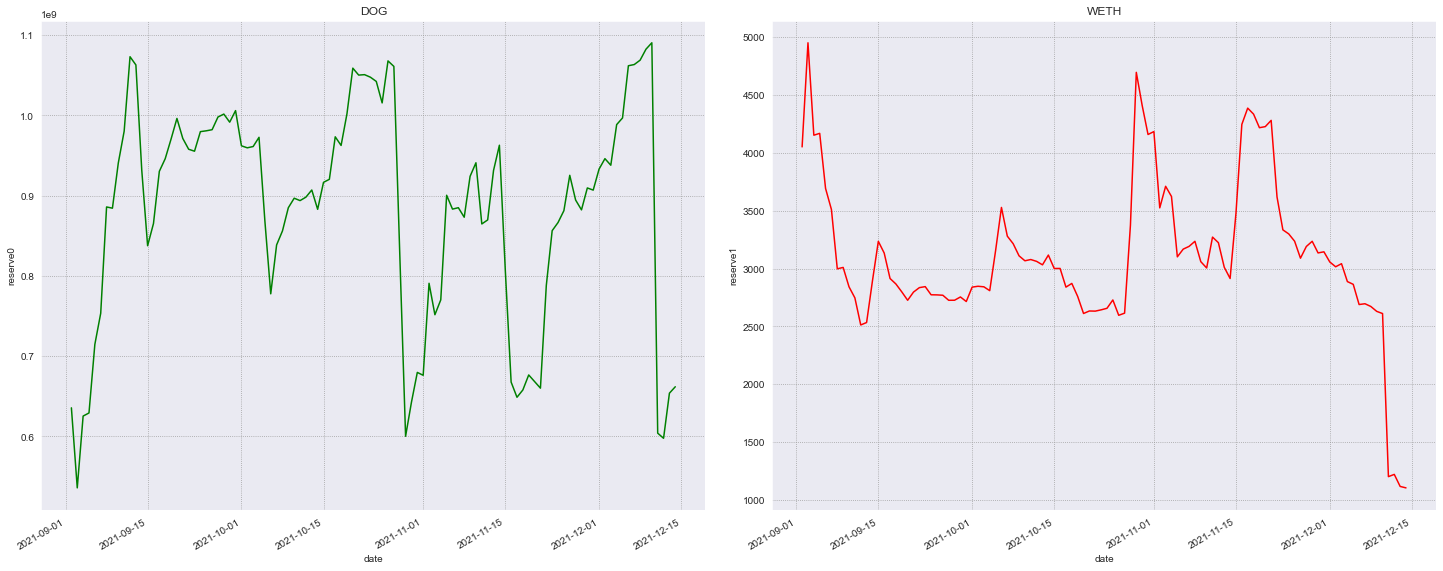

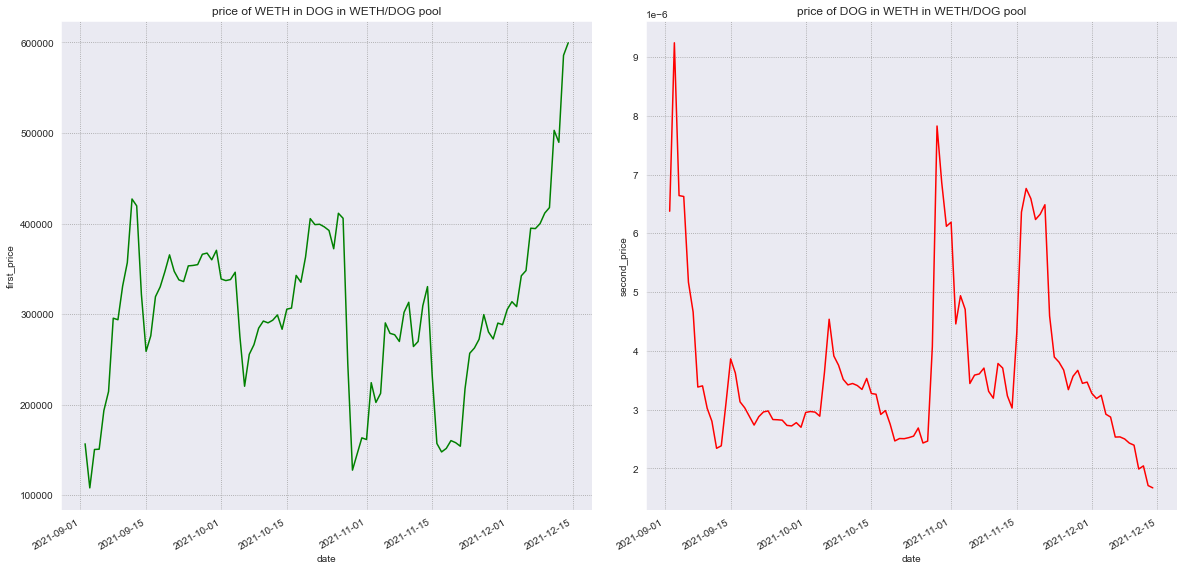

In [10]:
dog_weth_df = get_df_with_swap_prices_and_change_rates(dog_weth_df, 'DOG', 'WETH')

pyplot_line_swap_prices(dog_weth_df, 'DOG', 'WETH', xsize=20, ysize=10, wspace=0.1, hspace=0.1)

pyplot_line_swap_change_rate(dog_weth_df, 'DOG', 'WETH', xsize=20, ysize=10, wspace=0.1, hspace=0.1)

swaps_price_change_rates_moving_averages(dog_weth_df, 'DOG', 'WETH', 'Moving averages change rates for DOG',
                                           'Moving averages change rates for WETH', x_size=20, y_size=10, 
                                           wspace=0.1, hspace=0.1)

show_swaps_amount_in_moving_averages(swaps_df=dog_weth_df[(dog_weth_df.token_in == 'DOG')], 
                                     pool_name="DOG/WETH for DOG")
show_swaps_amount_in_moving_averages(swaps_df=dog_weth_df[(dog_weth_df.token_in == 'WETH')], 
                                     pool_name="DOG/WETH for WETH")

# swapping values histograms
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.histplot(data=dog_weth_df[dog_weth_df.token_in == 'DOG'], 
             x='timestamp', bins=(dog_weth_df.timestamp[len(dog_weth_df) - 1] - dog_weth_df.timestamp[0]).days, 
             color='red').set_title("Daily count swaps in for DOG in DOG/WETH pool")
plt.subplot(1, 2, 2)
sns.histplot(data=dog_weth_df[dog_weth_df.token_in == 'WETH'], 
             x='timestamp', bins=(dog_weth_df.timestamp[len(dog_weth_df) - 1] - dog_weth_df.timestamp[0]).days, 
             color='magenta').set_title("Daily count swaps in for WETH in DOG/WETH pool")
plt.subplots_adjust(wspace=0.1)
plt.show()

# swapping in values distribution
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.histplot(data=dog_weth_df[dog_weth_df.token_in == 'DOG'], 
             x='amount_in', bins=(dog_weth_df.timestamp[len(dog_weth_df) - 1] - dog_weth_df.timestamp[0]).days, 
             color='red').set_title("Swaps in values for DOG in DOG/WETH pool")
plt.subplot(1, 2, 2)
sns.histplot(data=dog_weth_df[dog_weth_df.token_in == 'WETH'], 
             x='amount_in', bins=(dog_weth_df.timestamp[len(dog_weth_df) - 1] - dog_weth_df.timestamp[0]).days, 
             color='magenta').set_title("Swaps in values for WETH in DOG/WETH pool")
plt.subplots_adjust(wspace=0.1)
plt.show()

show_reserves_time_distribution(dog_weth_reserves_df, first_token_reserve_name="DOG", 
                                           second_token_reserve_name="WETH", x=25, y=10, wspace=0.1)

show_reserve_price_distributions(dog_weth_reserves_df, 
                                        first_token_price_name="price of WETH in DOG in WETH/DOG pool", 
                                        second_token_price_name="price of DOG in WETH in WETH/DOG pool", 
                                        x=20, y=10, wspace=0.1)

In [6]:
dog_weth_df[dog_weth_df.price_change_rate > 300]

token_in token_out  amount_in     amount_out   amount_usd  \
1795     WETH       DOG   0.732161  111197.902644  2762.330111   

               timestamp                                      sender  \
1795 2021-09-03 03:18:14  0x724430950c98a3d67540e9cfa8be0809f4833e13   

                                              to  \
1795  0x7731ca4d00800b6a681d031f565deb355c5b77da   

                                                    txd  \
1795  0xa45cee771972f21818393ffa2111df891ad9110d24f8...   

      first_to_second_price  price_change_rate  
1795           151876.27483       1.518753e+07

In [7]:
dog_weth_df[(dog_weth_df.index > 1780) & (dog_weth_df.index < 1800)][
    ['token_in', 'token_out', 'amount_in', 'amount_out', 'amount_usd', 'timestamp', 
     'first_to_second_price', 'price_change_rate']
]

token_in token_out     amount_in    amount_out    amount_usd  \
1781     WETH       DOG  1.515658e-02  2.305236e+03  5.705727e+01   
1782     WETH       DOG  1.000000e+00  1.521270e+05  3.768735e+03   
1783      DOG      WETH  5.115499e+04  3.343045e-01  1.259905e+03   
1784     WETH       DOG  6.100306e-01  9.278098e+04  2.298992e+03   
1785     WETH       DOG  7.000000e-02  1.064403e+04  2.638056e+02   
1786     WETH       DOG  1.321200e-01  2.009082e+04  4.979142e+02   
1787     WETH       DOG  2.000000e-01  3.040804e+04  7.537302e+02   
1788     WETH       DOG  1.000000e-01  1.520512e+04  3.768651e+02   
1789     WETH       DOG  5.000000e-01  7.599984e+04  1.884342e+03   
1790     WETH       DOG  1.000000e-01  1.519776e+04  3.768683e+02   
1791     WETH       DOG  2.000000e-01  3.040509e+04  7.537366e+02   
1792     WETH       DOG  3.469375e-02  5.272499e+03  1.308105e+02   
1793     WETH       DOG  9.256591e-01  1.406421e+05  3.490815e+03   
1794     WETH       DOG  1.000000e-18  1.000000e-18  3.772845e-15   
1795     WETH       DOG  7.321611e-01  1.111979e+05  2.762330e+03   
1796      DOG      WETH  8.525832e+04  5.580274e-01  2.105383e+03   
1797      DOG      WETH  6.832238e+04  4.470701e-01  1.686752e+03   
1798     WETH       DOG  5.000000e-02  7.651800e+03  1.886451e+02   
1799      DOG      WETH  2.456156e+06  1.600779e+01  6.039583e+04   

               timestamp  first_to_second_price  price_change_rate  
1781 2021-09-03 03:08:26          152094.688665      -4.396761e-04  
1782 2021-09-03 03:09:52          152127.004367       2.124709e-02  
1783 2021-09-03 03:09:52               0.000007       1.742710e-02  
1784 2021-09-03 03:11:03          152092.342022      -2.278514e-02  
1785 2021-09-03 03:11:34          152057.504671      -2.290539e-02  
1786 2021-09-03 03:11:34          152064.957449       4.901289e-03  
1787 2021-09-03 03:12:26          152040.191800      -1.628623e-02  
1788 2021-09-03 03:12:26          152051.241268       7.267465e-03  
1789 2021-09-03 03:12:47          151999.683923      -3.390787e-02  
1790 2021-09-03 03:12:47          151977.563573      -1.455289e-02  
1791 2021-09-03 03:12:47          152025.453581       3.151124e-02  
1792 2021-09-03 03:14:06          151972.599905      -3.476633e-02  
1793 2021-09-03 03:16:15          151937.293557      -2.323205e-02  
1794 2021-09-03 03:17:31               1.000000      -9.999934e+01  
1795 2021-09-03 03:18:14          151876.274830       1.518753e+07  
1796 2021-09-03 03:18:37               0.000007       1.531304e-01  
1797 2021-09-03 03:19:46               0.000007      -2.442136e-02  
1798 2021-09-03 03:20:48          153036.004588       7.636017e-01  
1799 2021-09-03 03:20:48               0.000007      -3.992318e-01

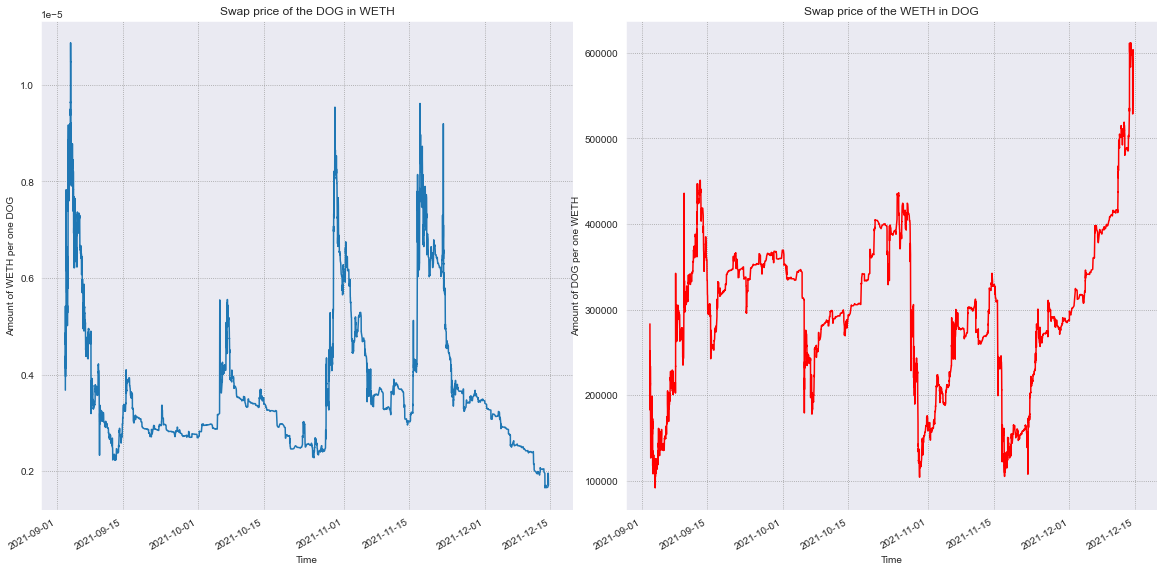

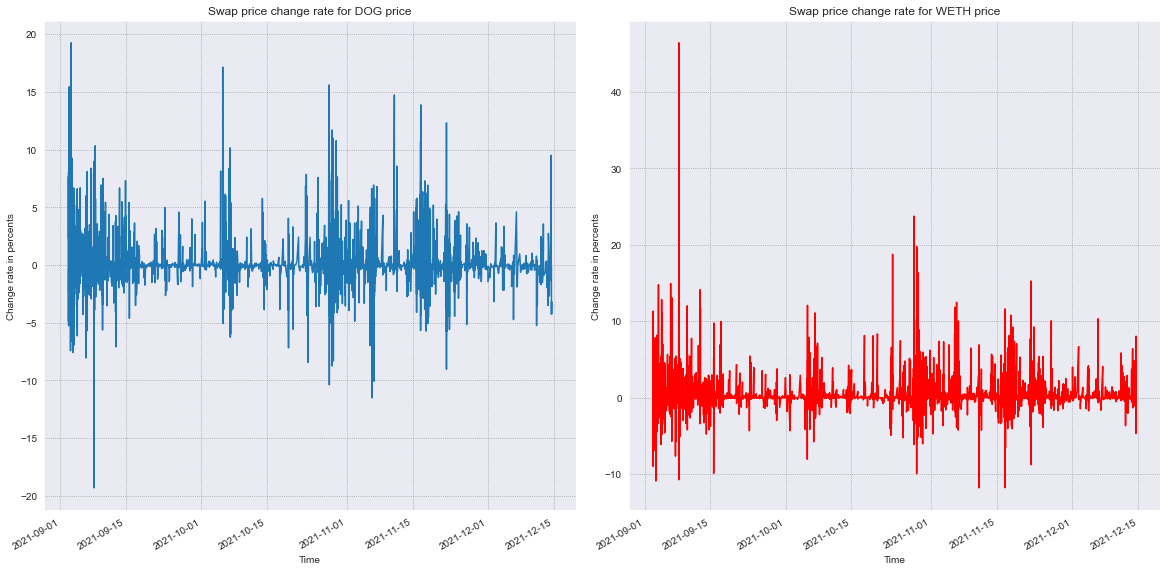

In [8]:
pyplot_line_swap_prices(dog_weth_df[(dog_weth_df.price_change_rate > -99) & (dog_weth_df.price_change_rate < 10000)], 'DOG', 'WETH', xsize=20, ysize=10, wspace=0.1, hspace=0.1)
pyplot_line_swap_change_rate(dog_weth_df[(dog_weth_df.price_change_rate > -99) & (dog_weth_df.price_change_rate < 10000)], 'DOG', 'WETH', xsize=20, ysize=10, wspace=0.1, hspace=0.1)

In [9]:
dog_weth_df[dog_weth_df.price_change_rate > 40]

token_in token_out  amount_in    amount_out    amount_usd  \
1795     WETH       DOG   0.732161  1.111979e+05   2762.330111   
6766     WETH       DOG   4.475955  1.532169e+06  15308.475616   

               timestamp                                      sender  \
1795 2021-09-03 03:18:14  0x724430950c98a3d67540e9cfa8be0809f4833e13   
6766 2021-09-08 06:12:46  0x7777777580290cede6e2121b846023fa1a1e4978   

                                              to  \
1795  0x7731ca4d00800b6a681d031f565deb355c5b77da   
6766  0x7777777580290cede6e2121b846023fa1a1e4978   

                                                    txd  \
1795  0xa45cee771972f21818393ffa2111df891ad9110d24f8...   
6766  0xc8765c5c254dd8550326a6710f2a4af8bb80c9380353...   

      first_to_second_price  price_change_rate  
1795          151876.274830       1.518753e+07  
6766          342311.182285       4.646393e+01

In [10]:
dog_weth_df[(dog_weth_df.index < 6780) & (dog_weth_df.index > 6760)][
    ['token_in', 'token_out', 'amount_in', 'amount_out', 'amount_usd', 'timestamp', 
     'first_to_second_price', 'price_change_rate']
]

token_in token_out     amount_in    amount_out    amount_usd  \
6761      DOG      WETH  4.000000e+05  1.786680e+00  6.146717e+03   
6762      DOG      WETH  1.963133e+07  8.546569e+01  2.925954e+05   
6763     WETH       DOG  3.127514e+00  7.316365e+05  1.069176e+04   
6764     WETH       DOG  1.000000e-02  2.337171e+03  3.420157e+01   
6765      DOG      WETH  1.666000e+08  5.851606e+02  2.001342e+06   
6766     WETH       DOG  4.475955e+00  1.532169e+06  1.530848e+04   
6767     WETH       DOG  3.048794e+00  1.040817e+06  1.042761e+04   
6768     WETH       DOG  3.009913e+02  9.264927e+07  1.029463e+06   
6769     WETH       DOG  3.507867e+01  9.634371e+06  1.199776e+05   
6770      DOG      WETH  9.264927e+07  3.058663e+02  1.046137e+06   
6771     WETH       DOG  9.800000e+01  3.153016e+07  3.347585e+05   
6772     WETH       DOG  4.394560e+00  1.465216e+06  1.501139e+04   
6773      DOG      WETH  1.465216e+06  4.676767e+00  1.597538e+04   
6774     WETH       DOG  7.363900e+00  2.291177e+06  2.515561e+04   
6775     WETH       DOG  4.000000e+01  1.224665e+07  1.366429e+05   
6776      DOG      WETH  2.291177e+06  7.521412e+00  2.569368e+04   
6777     WETH       DOG  2.950138e+01  8.867324e+06  1.002972e+05   
6778      DOG      WETH  5.434034e+05  1.862864e+00  6.329561e+03   
6779     WETH       DOG  4.000000e+01  1.174667e+07  1.359103e+05   

               timestamp  first_to_second_price  price_change_rate  
6761 2021-09-08 05:48:19               0.000004          -0.079932  
6762 2021-09-08 06:09:47               0.000004          -2.533521  
6763 2021-09-08 06:09:47          233935.495474          10.491334  
6764 2021-09-08 06:10:56          233717.052961          -0.093377  
6765 2021-09-08 06:12:46               0.000004         -19.321477  
6766 2021-09-08 06:12:46          342311.182285          46.463931  
6767 2021-09-08 06:12:51          341386.546107          -0.270116  
6768 2021-09-08 06:13:03          307813.722305          -9.834255  
6769 2021-09-08 06:13:03          274650.363959         -10.773840  
6770 2021-09-08 06:13:03               0.000003          -6.008273  
6771 2021-09-08 06:13:26          321736.347021          17.143973  
6772 2021-09-08 06:13:26          333415.784604           3.630127  
6773 2021-09-08 06:13:26               0.000003          -3.316036  
6774 2021-09-08 06:13:51          311136.404660          -6.682161  
6775 2021-09-08 06:13:51          306166.293547          -1.597406  
6776 2021-09-08 06:13:51               0.000003           2.848163  
6777 2021-09-08 06:14:47          300573.243389          -1.826801  
6778 2021-09-08 06:15:27               0.000003           4.428298  
6779 2021-09-08 06:15:27          293666.783904          -2.297763

In [11]:
dog_weth_mints_df

amount0      amount1     amountUSD     liquidity           timestamp
0   8.484848e+08  2985.000000  1.126153e+07  1.591454e+06 2021-09-02 18:58:39
1   2.553574e+06    12.000000  9.065086e+04  1.491186e+02 2021-09-02 19:13:57
2   1.131458e+05     0.573058  4.327569e+03  7.955130e+01 2021-09-02 19:23:54
3   2.839083e+06    13.204380  1.008869e+05  7.051724e+02 2021-09-02 21:22:37
4   1.131999e+06     7.000000  5.309290e+04  2.409574e+02 2021-09-03 00:16:35
..           ...          ...           ...           ...                 ...
70  5.454372e+03     0.024963  2.018278e+02  1.295484e+02 2021-11-22 21:27:14
71  9.115207e+05     2.993934  2.433856e+04  6.675950e+01 2021-11-26 16:08:04
72  2.000000e+06     5.070682  4.350462e+04  2.083994e+02 2021-12-07 23:30:36
73  1.584900e+03     0.003875  3.304444e+01  2.847136e+00 2021-12-09 14:40:52
74  1.487774e+06     2.900000  2.347669e+04  4.169195e+00 2021-12-12 01:52:15

[75 rows x 5 columns]

In [12]:
dog_weth_burns_df

amount0      amount1     amountUSD      liquidity           timestamp
0   2.840204e+06    13.199229  1.008229e+05    6104.874434 2021-09-02 21:27:09
1   5.464182e+04     0.298246  2.271189e+03     127.226311 2021-09-02 22:48:02
2   1.183244e+05     1.012607  8.038093e+03     343.315572 2021-09-03 15:45:31
3   1.173057e+05     0.869720  6.785388e+03     316.201449 2021-09-04 11:26:55
4   1.303380e+06     8.239186  6.363068e+04    3240.384845 2021-09-04 17:41:54
5   7.341154e+06    48.075311  3.713187e+05   18573.966075 2021-09-04 19:30:30
6   2.115522e+05     1.494807  1.158457e+04     555.481819 2021-09-05 08:19:40
7   1.677401e+05     0.957953  7.505631e+03     395.686920 2021-09-06 11:49:47
8   4.871057e+05     2.610115  2.037304e+04    1112.608763 2021-09-06 13:50:18
9   2.230418e+05     1.097538  8.626786e+03     488.048732 2021-09-06 17:54:38
10  1.702873e+05     0.828761  5.674096e+03     370.106881 2021-09-07 20:11:19
11  2.090491e+05     0.690186  4.861942e+03     373.569456 2021-09-08 18:57:35
12  9.716537e+05     2.275879  1.503740e+04    1458.365555 2021-09-13 02:45:45
13  8.944415e+04     0.198295  1.284603e+03     130.591823 2021-09-13 12:24:35
14  2.210903e+05     0.531681  3.520785e+03     336.150066 2021-09-14 02:05:58
15  2.310871e+06     6.393584  4.286181e+04    3766.775189 2021-09-14 19:04:29
16  2.286285e+05     0.844297  6.015468e+03     430.239162 2021-09-15 20:07:29
17  5.077210e+05     1.567452  1.078482e+04     873.195782 2021-09-17 11:54:01
18  4.314979e+05     1.202936  7.416989e+03     705.057678 2021-09-20 17:17:00
19  2.019336e+05     0.578453  3.394950e+03     334.412335 2021-09-22 10:32:29
20  3.351307e+04     0.099080  6.520900e+02      56.342777 2021-10-02 10:17:26
21  3.186916e+05     1.113799  7.941155e+03     580.805998 2021-10-10 05:48:15
22  1.991259e+05     0.680959  4.742660e+03     358.925481 2021-10-12 07:54:59
23  3.520613e+05     1.154934  8.916172e+03     621.321273 2021-10-15 21:50:11
24  1.022019e+06     3.322371  2.599679e+04    1795.475241 2021-10-16 08:34:53
25  3.013257e+05     0.977379  7.645076e+03     528.779930 2021-10-16 08:43:49
26  4.327454e+04     0.108545  8.866047e+02      66.722369 2021-10-23 20:37:19
27  3.751761e+05     2.572252  2.213649e+04     950.268661 2021-10-30 17:47:14
28  9.865583e+05     6.022213  5.110451e+04    2357.007104 2021-10-31 11:32:05
29  1.706247e+05     0.973005  8.280185e+03     393.959707 2021-10-31 19:55:04
30  4.100634e+06    24.131530  2.100272e+05    9613.158594 2021-11-02 05:20:20
31  6.359163e+05     3.508977  3.124555e+04    1443.433546 2021-11-02 11:39:00
32  7.971605e+05     3.798526  3.426752e+04    1681.184545 2021-11-02 19:44:41
33  6.086271e+04     0.286285  2.596214e+03     127.461373 2021-11-05 03:20:51
34  1.011408e+04     0.036182  3.328719e+02      18.448934 2021-11-07 12:44:28
35  3.943475e+06    15.057097  1.433797e+05    7427.495563 2021-11-12 05:56:02
36  1.852223e+04     0.056320  5.204675e+02      31.124409 2021-11-14 13:44:01
37  2.452939e+04     0.078071  7.389941e+02      42.165815 2021-11-15 09:30:35
38  1.967087e+05     0.850846  7.404744e+03     393.856858 2021-11-16 05:45:34
39  1.099127e+05     0.977789  8.163872e+03     314.676112 2021-11-17 09:15:53
40  2.207519e+04     0.149283  1.280027e+03      55.044746 2021-11-18 00:11:33
41  2.163156e+06    13.653156  1.174893e+05    5205.013249 2021-11-20 00:58:04
42  1.294486e+06     8.669866  7.459036e+04    3208.327358 2021-11-20 10:37:59
43  7.803006e+01     0.000473  4.133735e+00       0.183883 2021-11-21 16:07:11
44  1.147911e+06     4.243900  3.641725e+04    2103.770755 2021-11-25 09:13:31
45  7.011828e+04     0.254107  2.241238e+03     127.226311 2021-11-26 05:38:31
46  8.892240e+05     3.069568  2.530256e+04    1574.227017 2021-11-27 04:18:10
47  1.269820e+04     0.045030  3.885907e+02      22.779891 2021-11-29 11:46:41
48  4.585626e+05     1.626130  1.401170e+04     822.636437 2021-11-29 12:08:14
49  1.474614e+05     0.521308  4.544619e+03     264.126510 

In [13]:
dog_weth_reserves_df

reserve0     reserve1    reserveUSD  dailyVolumeToken0  \
0    6.356670e+08  4052.465452  3.074421e+07       2.406400e+09   
1    5.359100e+08  4952.562595  3.887745e+07       2.549169e+09   
2    6.253961e+08  4153.561977  3.226891e+07       1.135736e+09   
3    6.292579e+08  4169.444831  3.297632e+07       4.005114e+08   
4    7.146884e+08  3693.187451  2.903818e+07       8.375415e+08   
..            ...          ...           ...                ...   
99   1.090548e+09  2611.403060  2.057436e+07       3.648371e+07   
100  6.040909e+08  1201.298228  9.768884e+06       1.835483e+08   
101  5.977218e+08  1220.656373  1.008142e+07       1.005246e+08   
102  6.539216e+08  1116.595872  8.469772e+06       1.613282e+08   
103  6.619259e+08  1104.067177  8.364174e+06       1.909234e+08   

     dailyVolumeToken1       date token0 token1     volumeUSD    first_price  \
0         11710.097827 2021-09-02     {}     {}  4.437262e+07  156859.315855   
1         19030.678924 2021-09-03     {}     {}  7.409306e+07  108208.629274   
2          8400.716606 2021-09-04     {}     {}  3.279313e+07  150568.624050   
3          2734.883557 2021-09-05     {}     {}  1.063977e+07  150921.258624   
4          4604.197071 2021-09-06     {}     {}  1.807797e+07  193515.336557   
..                 ...        ...    ...    ...           ...            ...   
99           87.770988 2021-12-10     {}     {}  3.576902e+05  417610.019908   
100         395.253618 2021-12-11     {}     {}  1.587640e+06  502865.029398   
101         200.294294 2021-12-12     {}     {}  8.183362e+05  489672.412408   
102         289.915025 2021-12-13     {}     {}  1.090240e+06  585638.533415   
103         339.450726 2021-12-14     {}     {}  1.296598e+06  599534.044711   

     second_price  
0        0.000006  
1        0.000009  
2        0.000007  
3        0.000007  
4        0.000005  
..            ...  
99       0.000002  
100      0.000002  
101      0.000002  
102      0.000002  
103      0.000002  

[104 rows x 11 columns]

# NFD/WETH

In [3]:
nfd_weth_df = pd.read_pickle(os.getcwd() + '\\pkl_stories\\nfd_weth_swaps.pkl')
nfd_weth_mints_df = pd.read_pickle(os.getcwd() + "\\pkl_stories\\nfd_weth_mints.pkl")
nfd_weth_burns_df = pd.read_pickle(os.getcwd() + "\\pkl_stories\\nfd_weth_burns.pkl")
nfd_weth_reserves_df = pd.read_pickle(os.getcwd() + "\\pkl_stories\\nfd_weth_reserves.pkl")

C:\Users\Zbook\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


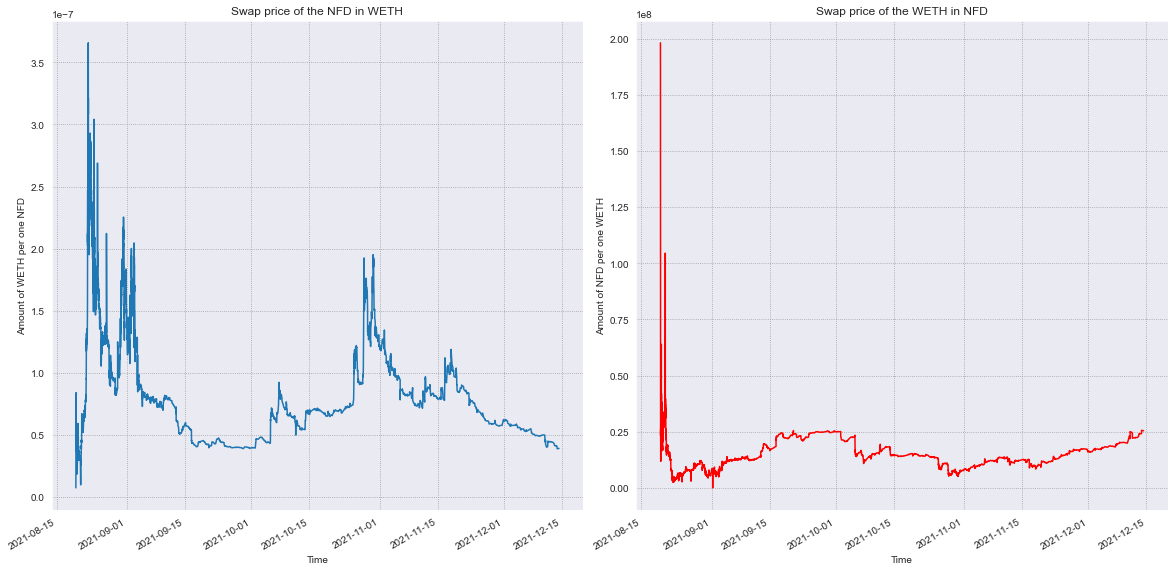

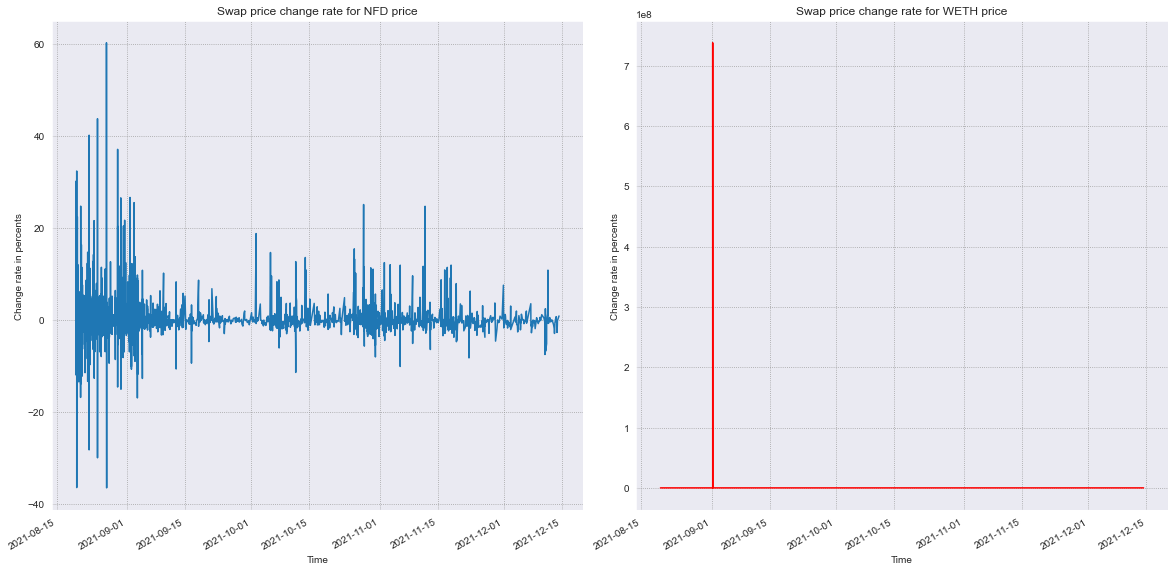

C:/workspace/data-science//libs\uniswap_v2_tools.py:235: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
C:/workspace/data-science//libs\uniswap_v2_tools.py:242: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)


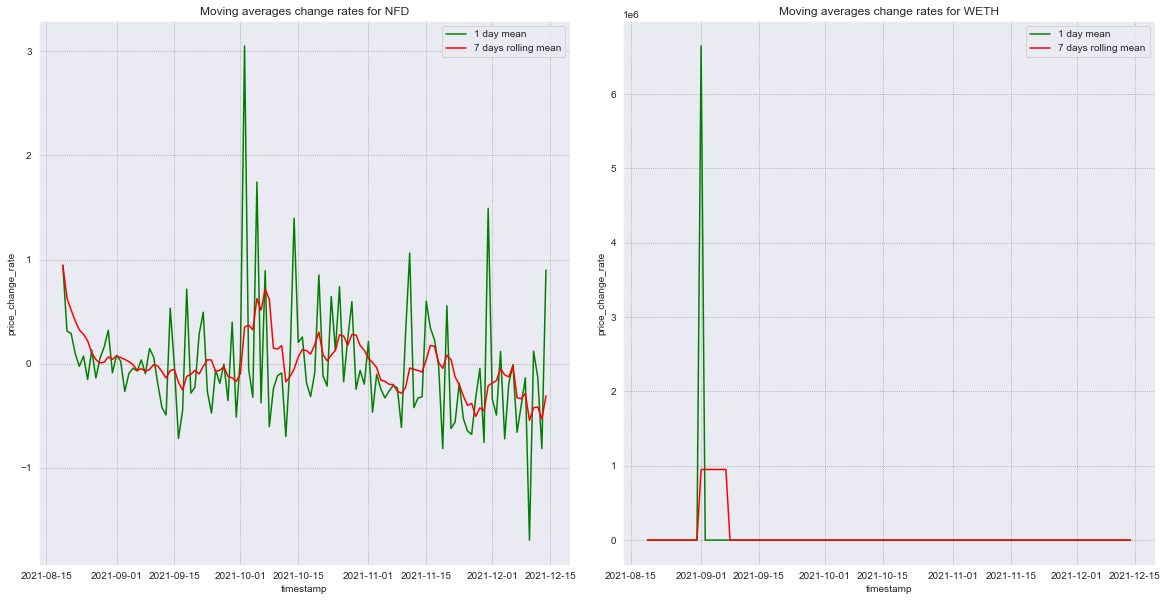

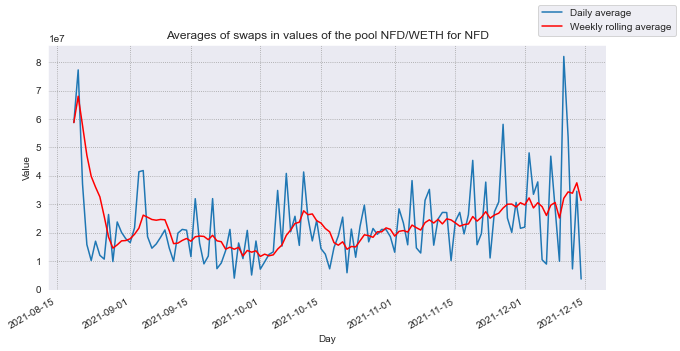

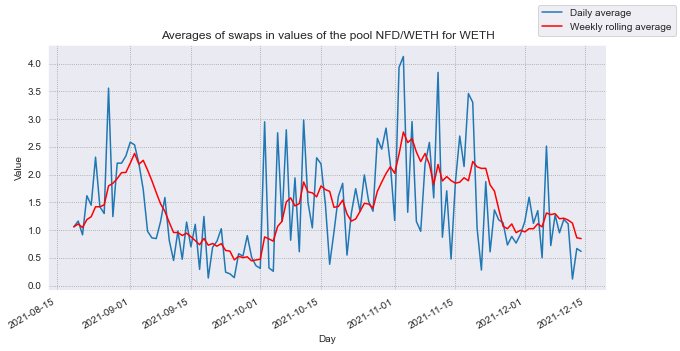

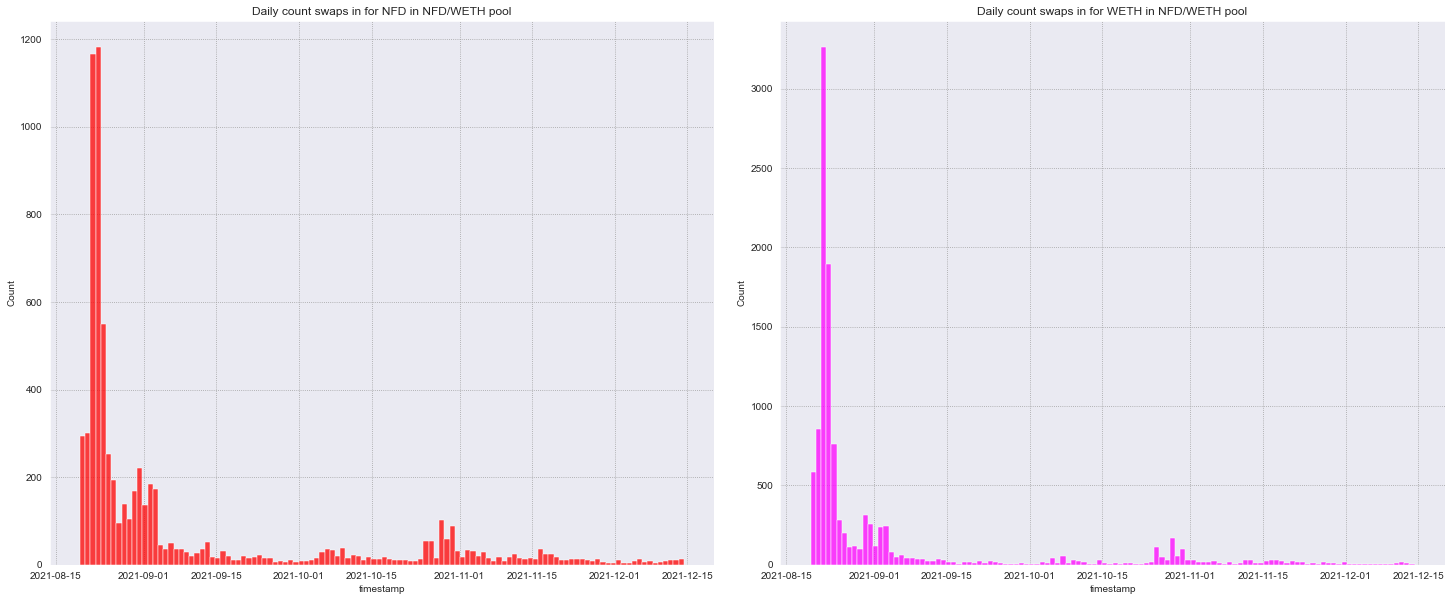

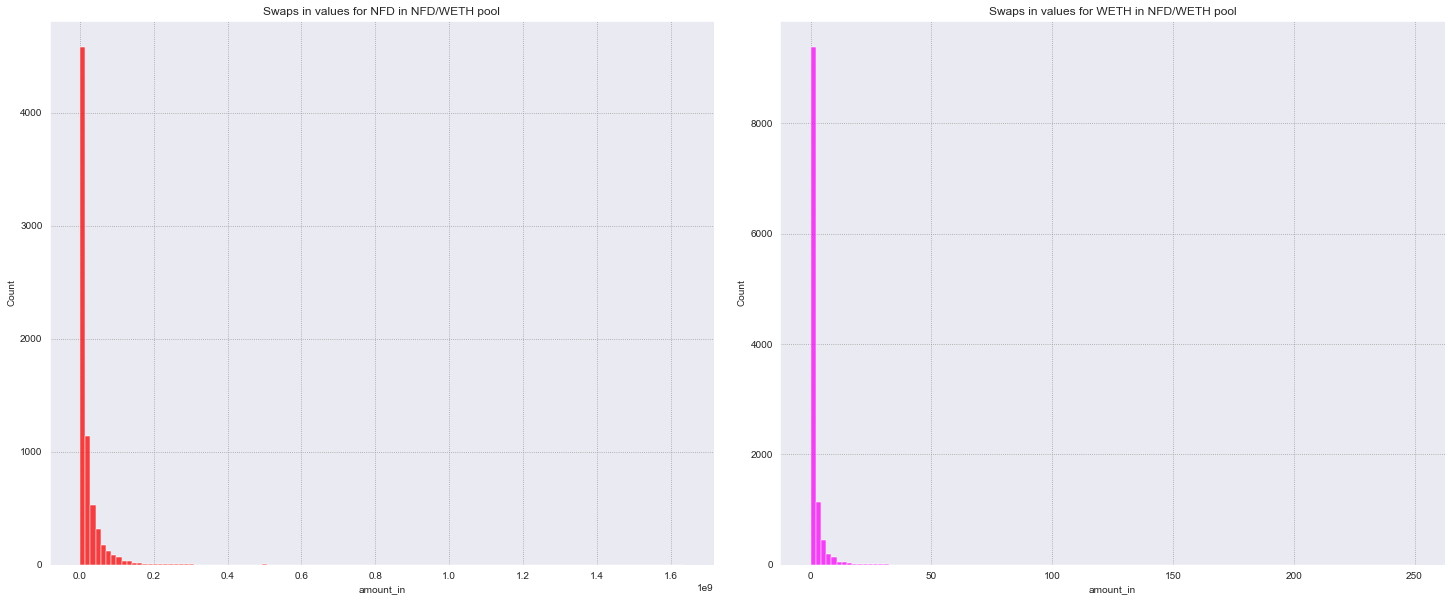

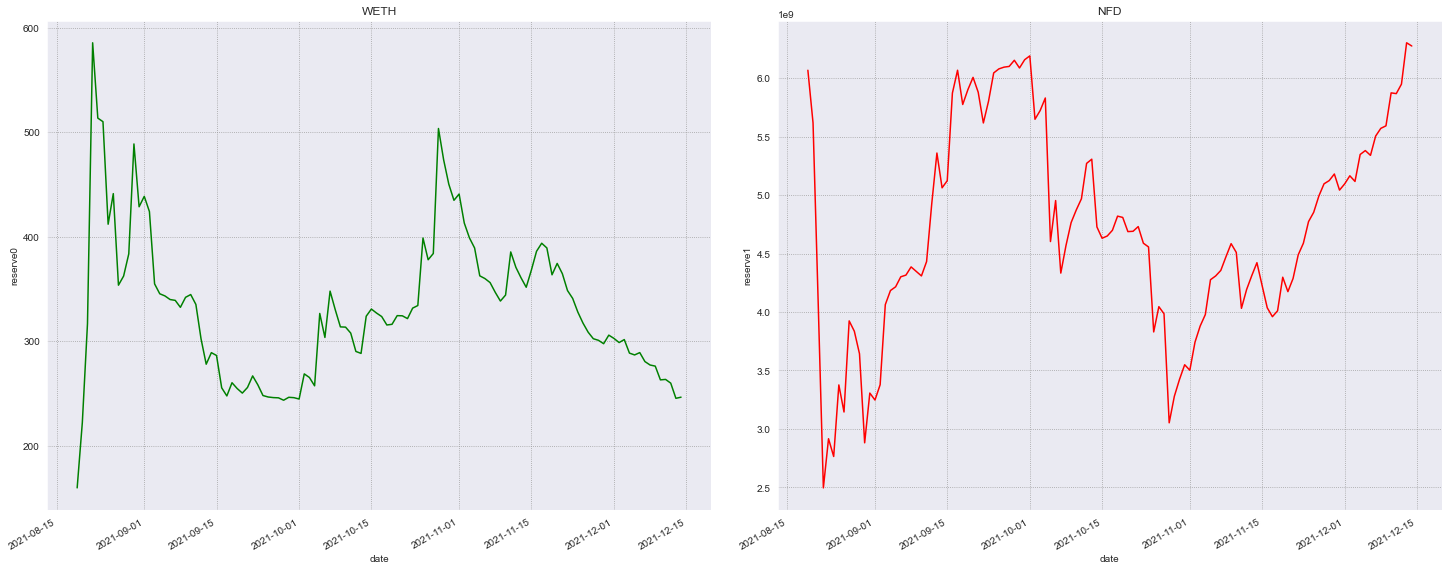

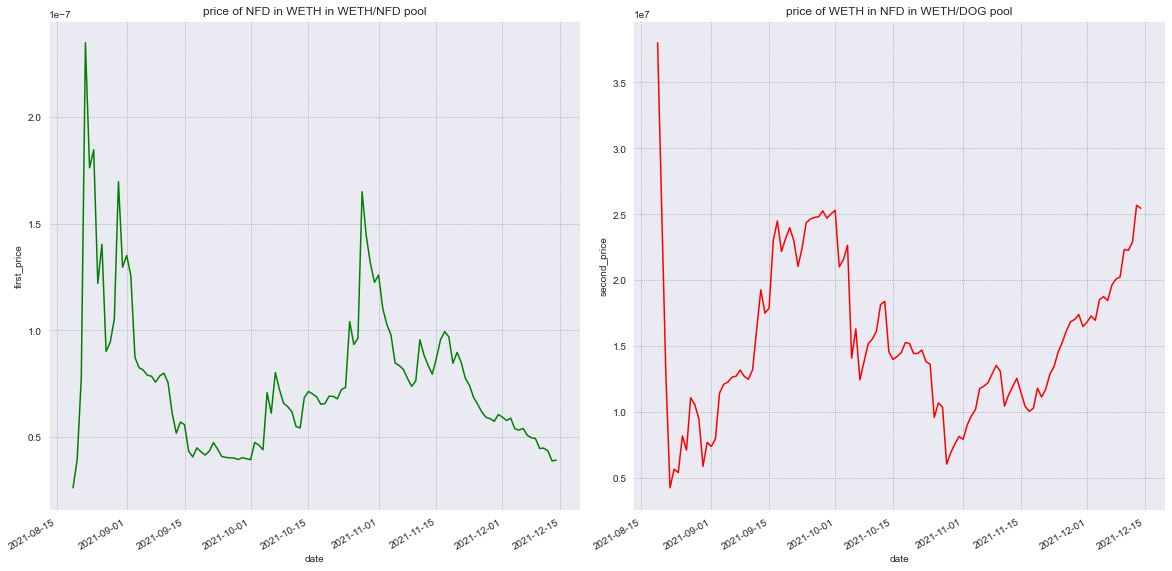

In [4]:
nfd_weth_df = get_df_with_swap_prices_and_change_rates(nfd_weth_df, 'NFD', 'WETH')

pyplot_line_swap_prices(nfd_weth_df, 'NFD', 'WETH', xsize=20, ysize=10, wspace=0.1, hspace=0.1)

pyplot_line_swap_change_rate(nfd_weth_df, 'NFD', 'WETH', xsize=20, ysize=10, wspace=0.1, hspace=0.1)

swaps_price_change_rates_moving_averages(nfd_weth_df, 'NFD', 'WETH', 'Moving averages change rates for NFD',
                                           'Moving averages change rates for WETH', x_size=20, y_size=10, wspace=0.1, hspace=0.1)

show_swaps_amount_in_moving_averages(swaps_df=nfd_weth_df[(nfd_weth_df.token_in == 'NFD')], pool_name="NFD/WETH for NFD")
show_swaps_amount_in_moving_averages(swaps_df=nfd_weth_df[(nfd_weth_df.token_in == 'WETH')], pool_name="NFD/WETH for WETH")

# swapping values histograms
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.histplot(data=nfd_weth_df[nfd_weth_df.token_in == 'NFD'], x='timestamp', 
             bins=(nfd_weth_df.timestamp[len(nfd_weth_df) - 1] - nfd_weth_df.timestamp[0]).days, 
             color='red').set_title("Daily count swaps in for NFD in NFD/WETH pool")
plt.subplot(1, 2, 2)
sns.histplot(data=nfd_weth_df[nfd_weth_df.token_in == 'WETH'], x='timestamp', 
             bins=(nfd_weth_df.timestamp[len(nfd_weth_df) - 1] - nfd_weth_df.timestamp[0]).days, 
             color='magenta').set_title("Daily count swaps in for WETH in NFD/WETH pool")
plt.subplots_adjust(wspace=0.1)
plt.show()

# swapping in values distribution
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.histplot(data=nfd_weth_df[nfd_weth_df.token_in == 'NFD'], x='amount_in', 
             bins=(nfd_weth_df.timestamp[len(nfd_weth_df) - 1] - nfd_weth_df.timestamp[0]).days, 
             color='red').set_title("Swaps in values for NFD in NFD/WETH pool")
plt.subplot(1, 2, 2)
sns.histplot(data=nfd_weth_df[nfd_weth_df.token_in == 'WETH'], x='amount_in', 
             bins=(nfd_weth_df.timestamp[len(nfd_weth_df) - 1] - nfd_weth_df.timestamp[0]).days, 
             color='magenta').set_title("Swaps in values for WETH in NFD/WETH pool")
plt.subplots_adjust(wspace=0.1)
plt.show()

show_reserves_time_distribution(nfd_weth_reserves_df, first_token_reserve_name="WETH", 
                                           second_token_reserve_name="NFD", x=25, y=10, wspace=0.1)

show_reserve_price_distributions(nfd_weth_reserves_df, first_token_price_name="price of NFD in WETH in WETH/NFD pool", 
                                        second_token_price_name="price of WETH in NFD in WETH/DOG pool", x=20, y=10, wspace=0.1)

In [13]:
nfd_weth_df[nfd_weth_df.price_change_rate > 10000][
    ['token_in', 'token_out', 'amount_in', 'amount_out', 'amount_usd', 'timestamp', 
     'first_to_second_price', 'price_change_rate']
]

token_in token_out  amount_in  amount_out   amount_usd  \
13572     WETH       NFD   2.710541  20000000.0  9537.998213   

                timestamp  first_to_second_price  price_change_rate  
13572 2021-09-01 06:45:22           7.378600e+06       7.378599e+08

In [14]:
nfd_weth_df[(nfd_weth_df.index > 13560) & (nfd_weth_df.index < 13580)][
    ['token_in', 'token_out', 'amount_in', 'amount_out', 'amount_usd', 'timestamp', 
     'first_to_second_price', 'price_change_rate']
]

token_in token_out     amount_in    amount_out    amount_usd  \
13561      NFD      WETH  5.091563e+07  6.534754e+00  2.276703e+04   
13562     WETH       NFD  6.483100e+00  5.091563e+07  2.258706e+04   
13563     WETH       NFD  3.000000e+00  2.304244e+07  1.045197e+04   
13564     WETH       NFD  5.559957e+00  4.316226e+07  1.949529e+04   
13565      NFD      WETH  8.347105e+06  1.080082e+00  3.787178e+03   
13566     WETH       NFD  5.640345e-01  4.338124e+06  1.978064e+03   
13567     WETH       NFD  5.271339e+00  4.000000e+07  1.852758e+04   
13568     WETH       NFD  3.000000e+00  2.233462e+07  1.056523e+04   
13569      NFD      WETH  7.742061e+06  1.038356e+00  3.656824e+03   
13570     WETH       NFD  1.417488e-01  1.052724e+06  4.985336e+02   
13571     WETH       NFD  1.000000e-18  1.000000e-18  3.516481e-15   
13572     WETH       NFD  2.710541e+00  2.000000e+07  9.537998e+03   
13573     WETH       NFD  5.639545e+00  3.960985e+07  1.985895e+04   
13574     WETH       NFD  6.780500e+00  4.896822e+07  2.387668e+04   
13575      NFD      WETH  4.896822e+07  6.910437e+00  2.433424e+04   
13576      NFD      WETH  1.126053e+07  1.559228e+00  5.490572e+03   
13577      NFD      WETH  1.561943e+07  2.144763e+00  7.560969e+03   
13578      NFD      WETH  1.244373e+07  1.693871e+00  5.971266e+03   
13579     WETH       NFD  1.475296e+01  1.046441e+08  5.201656e+04   

                timestamp  first_to_second_price  price_change_rate  
13561 2021-09-01 05:16:27           1.283447e-07       2.780126e+00  
13562 2021-09-01 05:16:27           7.853594e+06      -1.789453e+00  
13563 2021-09-01 05:16:27           7.680815e+06      -2.200001e+00  
13564 2021-09-01 05:49:30           7.763056e+06       1.070741e+00  
13565 2021-09-01 05:49:35           1.293960e-07       8.191124e-01  
13566 2021-09-01 05:50:37           7.691239e+06      -9.251177e-01  
13567 2021-09-01 05:53:08           7.588204e+06      -1.339633e+00  
13568 2021-09-01 06:00:42           7.444873e+06      -1.888875e+00  
13569 2021-09-01 06:00:42           1.341188e-07       3.649863e+00  
13570 2021-09-01 06:37:03           7.426690e+06      -2.442355e-01  
13571 2021-09-01 06:42:52           1.000000e+00      -9.999999e+01  
13572 2021-09-01 06:45:22           7.378600e+06       7.378599e+08  
13573 2021-09-01 06:55:02           7.023591e+06      -4.811339e+00  
13574 2021-09-01 06:55:02           7.221919e+06       2.823743e+00  
13575 2021-09-01 06:55:02           1.411209e-07       5.220790e+00  
13576 2021-09-01 06:58:29           1.384684e-07      -1.879581e+00  
13577 2021-09-01 07:07:14           1.373137e-07      -8.338645e-01  
13578 2021-09-01 07:08:16           1.361224e-07      -8.675721e-01  
13579 2021-09-01 07:10:22           7.093091e+06      -1.783841e+00

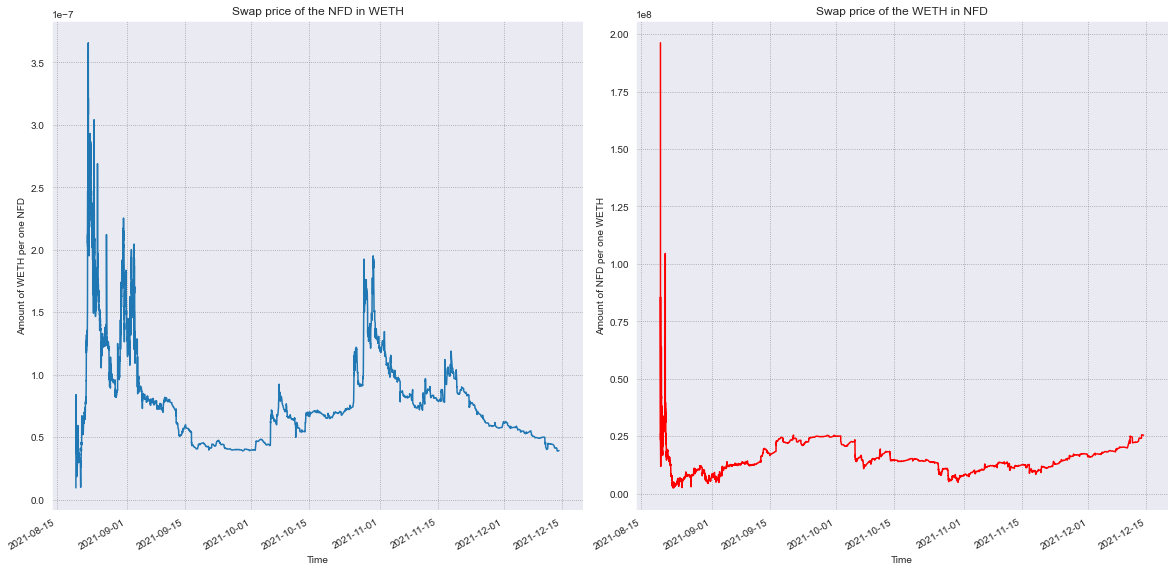

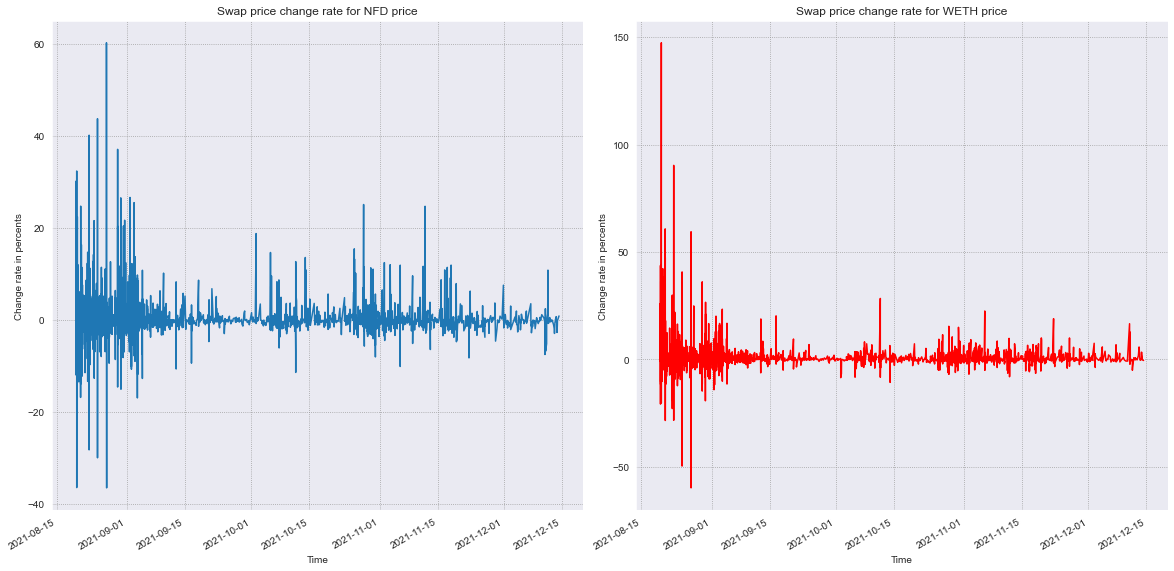

In [15]:
pyplot_line_swap_prices(nfd_weth_df[(nfd_weth_df.price_change_rate > -99) & 
                                    (nfd_weth_df.price_change_rate < 10000)], 'NFD', 'WETH', xsize=20, ysize=10, wspace=0.1, hspace=0.1)
pyplot_line_swap_change_rate(nfd_weth_df[(nfd_weth_df.price_change_rate > -99) & 
                                         (nfd_weth_df.price_change_rate < 10000)], 'NFD', 'WETH', xsize=20, ysize=10, wspace=0.1, hspace=0.1)

In [16]:
nfd_weth_df[nfd_weth_df.price_change_rate > 100]

token_in token_out  amount_in    amount_out   amount_usd  \
430       WETH       NFD   0.050000  3.196709e+06   157.851254   
13572     WETH       NFD   2.710541  2.000000e+07  9537.998213   

                timestamp                                      sender  \
430   2021-08-19 21:08:05  0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f   
13572 2021-09-01 06:45:22  0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f   

                                               to  \
430    0xe7a1006ea1d26742a10f60f996c310daa013a898   
13572  0xd1ac0e75c931e7e7363d6a9b262699b45d0b3177   

                                                     txd  \
430    0x36ef7a2f724df6302ab2acc0a6b0a320c5f70d9f8c2b...   
13572  0xec301869356756106ee2867ea011b64d9b5aef727618...   

       first_to_second_price  price_change_rate  
430             6.393417e+07       1.474325e+02  
13572           7.378600e+06       7.378599e+08

In [17]:
nfd_weth_df[(nfd_weth_df.index > 410) & (nfd_weth_df.index < 432)][
    ['token_in', 'token_out', 'amount_in', 'amount_out', 'amount_usd', 'timestamp', 
     'first_to_second_price', 'price_change_rate']
]

token_in token_out     amount_in    amount_out    amount_usd  \
411      NFD      WETH  8.452847e+07  3.977821e+00  12534.568739   
412     WETH       NFD  6.751820e-02  1.500000e+06    212.757554   
413     WETH       NFD  1.982500e-02  4.399295e+05     62.471089   
414      NFD      WETH  6.971550e+07  3.000000e+00   9452.675117   
415      NFD      WETH  7.571881e+07  3.000000e+00   9456.507825   
416      NFD      WETH  5.393461e+07  1.990145e+00   6273.450728   
417     WETH       NFD  1.000000e-01  2.769097e+06    315.219228   
418      NFD      WETH  5.599428e+06  2.007013e-01    632.825092   
419     WETH       NFD  7.500000e-01  2.063305e+07   2367.213417   
420      NFD      WETH  4.513924e+07  1.610230e+00   5082.361798   
421     WETH       NFD  8.760288e-04  2.500000e+04      2.764642   
422     WETH       NFD  4.000000e-01  1.134729e+07   1262.361662   
423     WETH       NFD  1.680792e+00  4.624475e+07   5304.294044   
424     WETH       NFD  1.543720e+01  3.387241e+08  48717.061605   
425     WETH       NFD  1.914300e+00  3.355713e+07   6041.190827   
426      NFD      WETH  3.387241e+08  1.599973e+01  50492.291856   
427     WETH       NFD  3.000000e-02  7.751712e+05     94.672233   
428      NFD      WETH  4.624475e+07  1.735813e+00   5478.086068   
429      NFD      WETH  1.000000e+09  2.386395e+01  75375.432567   
430     WETH       NFD  5.000000e-02  3.196709e+06    157.851254   
431     WETH       NFD  4.000000e-02  2.555494e+06    126.279167   

              timestamp  first_to_second_price  price_change_rate  
411 2021-08-19 20:33:14           4.705895e-08          -4.262671  
412 2021-08-19 20:35:01           2.221623e+07          10.264675  
413 2021-08-19 20:35:12           2.219064e+07          -0.115178  
414 2021-08-19 20:40:30           4.303204e-08          -8.557161  
415 2021-08-19 20:41:41           3.962027e-08          -7.928427  
416 2021-08-19 20:43:35           3.689921e-08          -6.867851  
417 2021-08-19 20:45:35           2.769097e+07          24.786680  
418 2021-08-19 20:46:18           3.584318e-08          -2.861933  
419 2021-08-19 20:53:05           2.751074e+07          -0.650865  
420 2021-08-19 20:56:33           3.567251e-08          -0.476177  
421 2021-08-19 20:59:07           2.853788e+07           3.733588  
422 2021-08-19 20:59:49           2.836822e+07          -0.594486  
423 2021-08-19 21:00:47           2.751366e+07          -3.012374  
424 2021-08-19 21:02:04           2.194207e+07         -20.250295  
425 2021-08-19 21:02:04           1.752971e+07         -20.109102  
426 2021-08-19 21:02:04           4.723528e-08          32.413679  
427 2021-08-19 21:02:55           2.583904e+07          47.401373  
428 2021-08-19 21:05:34           3.753535e-08         -20.535349  
429 2021-08-19 21:06:34           2.386395e-08         -36.422727  
430 2021-08-19 21:08:05           6.393417e+07         147.432471  
431 2021-08-19 21:09:18           6.388735e+07          -0.073238

In [6]:
nfd_weth_mints_df

amount0       amount1      amountUSD      liquidity           timestamp
0    25.000000  5.000000e+09   76667.032765  353553.390593 2021-08-19 15:47:00
1    77.939140  5.000000e+09  492106.279383     730.475939 2021-08-19 21:08:05
2     0.350000  8.762175e+06    2257.539261     702.724780 2021-08-20 06:41:53
3   100.000000  1.015455e+10  650402.199250      19.578852 2021-08-20 20:02:44
4     0.081010  2.749563e+06     529.241386     575.866048 2021-08-20 20:43:16
..         ...           ...            ...            ...                 ...
60    3.419492  5.102248e+07   24382.854865      25.587058 2021-10-10 11:10:26
61    0.035895  3.562631e+05     300.679839     330.194800 2021-10-25 20:10:01
62    2.590341  1.570025e+07   22160.521381     685.596649 2021-10-29 00:00:55
63    3.700190  2.796319e+07   32110.859775      85.559058 2021-10-29 05:22:24
64    0.150408  1.000000e+06    1294.390845      45.588516 2021-10-30 17:46:10

[65 rows x 5 columns]

In [7]:
nfd_weth_burns_df

amount0      amount1     amountUSD      liquidity           timestamp
0   2.840204e+06    13.199229  1.008229e+05    6104.874434 2021-09-02 21:27:09
1   5.464182e+04     0.298246  2.271189e+03     127.226311 2021-09-02 22:48:02
2   1.183244e+05     1.012607  8.038093e+03     343.315572 2021-09-03 15:45:31
3   1.173057e+05     0.869720  6.785388e+03     316.201449 2021-09-04 11:26:55
4   1.303380e+06     8.239186  6.363068e+04    3240.384845 2021-09-04 17:41:54
5   7.341154e+06    48.075311  3.713187e+05   18573.966075 2021-09-04 19:30:30
6   2.115522e+05     1.494807  1.158457e+04     555.481819 2021-09-05 08:19:40
7   1.677401e+05     0.957953  7.505631e+03     395.686920 2021-09-06 11:49:47
8   4.871057e+05     2.610115  2.037304e+04    1112.608763 2021-09-06 13:50:18
9   2.230418e+05     1.097538  8.626786e+03     488.048732 2021-09-06 17:54:38
10  1.702873e+05     0.828761  5.674096e+03     370.106881 2021-09-07 20:11:19
11  2.090491e+05     0.690186  4.861942e+03     373.569456 2021-09-08 18:57:35
12  9.716537e+05     2.275879  1.503740e+04    1458.365555 2021-09-13 02:45:45
13  8.944415e+04     0.198295  1.284603e+03     130.591823 2021-09-13 12:24:35
14  2.210903e+05     0.531681  3.520785e+03     336.150066 2021-09-14 02:05:58
15  2.310871e+06     6.393584  4.286181e+04    3766.775189 2021-09-14 19:04:29
16  2.286285e+05     0.844297  6.015468e+03     430.239162 2021-09-15 20:07:29
17  5.077210e+05     1.567452  1.078482e+04     873.195782 2021-09-17 11:54:01
18  4.314979e+05     1.202936  7.416989e+03     705.057678 2021-09-20 17:17:00
19  2.019336e+05     0.578453  3.394950e+03     334.412335 2021-09-22 10:32:29
20  3.351307e+04     0.099080  6.520900e+02      56.342777 2021-10-02 10:17:26
21  3.186916e+05     1.113799  7.941155e+03     580.805998 2021-10-10 05:48:15
22  1.991259e+05     0.680959  4.742660e+03     358.925481 2021-10-12 07:54:59
23  3.520613e+05     1.154934  8.916172e+03     621.321273 2021-10-15 21:50:11
24  1.022019e+06     3.322371  2.599679e+04    1795.475241 2021-10-16 08:34:53
25  3.013257e+05     0.977379  7.645076e+03     528.779930 2021-10-16 08:43:49
26  4.327454e+04     0.108545  8.866047e+02      66.722369 2021-10-23 20:37:19
27  3.751761e+05     2.572252  2.213649e+04     950.268661 2021-10-30 17:47:14
28  9.865583e+05     6.022213  5.110451e+04    2357.007104 2021-10-31 11:32:05
29  1.706247e+05     0.973005  8.280185e+03     393.959707 2021-10-31 19:55:04
30  4.100634e+06    24.131530  2.100272e+05    9613.158594 2021-11-02 05:20:20
31  6.359163e+05     3.508977  3.124555e+04    1443.433546 2021-11-02 11:39:00
32  7.971605e+05     3.798526  3.426752e+04    1681.184545 2021-11-02 19:44:41
33  6.086271e+04     0.286285  2.596214e+03     127.461373 2021-11-05 03:20:51
34  1.011408e+04     0.036182  3.328719e+02      18.448934 2021-11-07 12:44:28
35  3.943475e+06    15.057097  1.433797e+05    7427.495563 2021-11-12 05:56:02
36  1.852223e+04     0.056320  5.204675e+02      31.124409 2021-11-14 13:44:01
37  2.452939e+04     0.078071  7.389941e+02      42.165815 2021-11-15 09:30:35
38  1.967087e+05     0.850846  7.404744e+03     393.856858 2021-11-16 05:45:34
39  1.099127e+05     0.977789  8.163872e+03     314.676112 2021-11-17 09:15:53
40  2.207519e+04     0.149283  1.280027e+03      55.044746 2021-11-18 00:11:33
41  2.163156e+06    13.653156  1.174893e+05    5205.013249 2021-11-20 00:58:04
42  1.294486e+06     8.669866  7.459036e+04    3208.327358 2021-11-20 10:37:59
43  7.803006e+01     0.000473  4.133735e+00       0.183883 2021-11-21 16:07:11
44  1.147911e+06     4.243900  3.641725e+04    2103.770755 2021-11-25 09:13:31
45  7.011828e+04     0.254107  2.241238e+03     127.226311 2021-11-26 05:38:31
46  8.892240e+05     3.069568  2.530256e+04    1574.227017 2021-11-27 04:18:10
47  1.269820e+04     0.045030  3.885907e+02      22.779891 2021-11-29 11:46:41
48  4.585626e+05     1.626130  1.401170e+04     822.636437 2021-11-29 12:08:14
49  1.474614e+05     0.521308  4.544619e+03     264.126510 

In [8]:
nfd_weth_reserves_df

reserve0      reserve1    reserveUSD  dailyVolumeToken0  \
0    159.644589  6.067606e+09  1.012567e+06         771.187922   
1    222.096042  5.617182e+09  1.455379e+06        1188.345573   
2    316.784630  4.076239e+09  2.049633e+06        1291.257563   
3    585.635572  2.495918e+09  3.801477e+06       12909.239846   
4    513.546390  2.916227e+09  3.415693e+06        3264.012821   
..          ...           ...           ...                ...   
113  263.020718  5.874116e+09  2.076374e+06          32.200850   
114  263.444320  5.867779e+09  2.133506e+06          46.323958   
115  259.880370  5.948668e+09  2.154537e+06           6.153064   
116  245.364917  6.302465e+09  1.855154e+06          25.180099   
117  246.447289  6.274891e+09  1.843950e+06           1.378203   

     dailyVolumeToken1       date token0 token1     volumeUSD   first_price  \
0         2.708090e+10 2021-08-19     {}     {}  2.388929e+06  2.631097e-08   
1         4.028378e+10 2021-08-20     {}     {}  3.865058e+06  3.953869e-08   
2         2.120687e+10 2021-08-21     {}     {}  4.214363e+06  7.771494e-08   
3         5.637942e+10 2021-08-22     {}     {}  4.136861e+07  2.346374e-07   
4         1.477096e+10 2021-08-23     {}     {}  1.082094e+07  1.760996e-07   
..                 ...        ...    ...    ...           ...           ...   
113       7.017492e+08 2021-12-10     {}     {}  1.287948e+05  4.477622e-08   
114       1.078618e+09 2021-12-11     {}     {}  1.844288e+05  4.489677e-08   
115       1.388439e+08 2021-12-12     {}     {}  2.519485e+04  4.368716e-08   
116       6.152175e+08 2021-12-13     {}     {}  9.671796e+04  3.893158e-08   
117       3.512483e+07 2021-12-14     {}     {}  5.185623e+03  3.927515e-08   

     second_price  
0    3.800696e+07  
1    2.529168e+07  
2    1.286754e+07  
3    4.261896e+06  
4    5.678604e+06  
..            ...  
113  2.233328e+07  
114  2.227332e+07  
115  2.289002e+07  
116  2.568609e+07  
117  2.546139e+07  

[118 rows x 11 columns]

# LADY/WETH

In [18]:
lady_weth_df = pd.read_pickle(os.getcwd() + '\\pkl_stories\\lady_weth_swaps.pkl')
lady_weth_mints_df = pd.read_pickle(os.getcwd() + "\\pkl_stories\\lady_weth_mints.pkl")
# lady_weth_burns_df = pd.read_pickle(os.getcwd() + "\\pkl_stories\\lady_weth_burns.pkl")
lady_weth_reserves_df = pd.read_pickle(os.getcwd() + "\\pkl_stories\\lady_weth_reserves.pkl")

C:\Users\Zbook\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


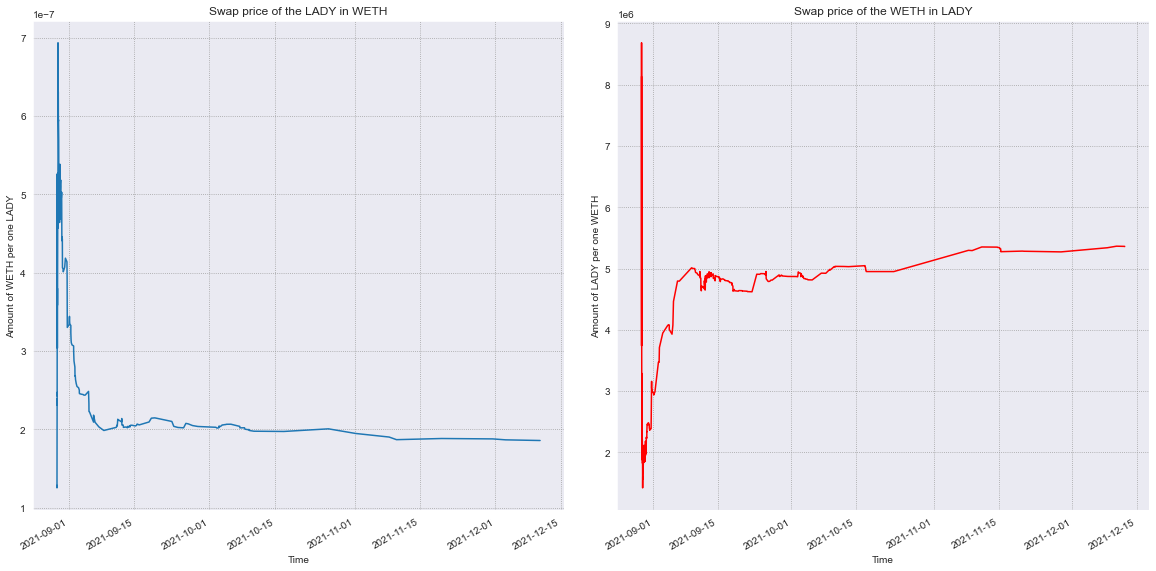

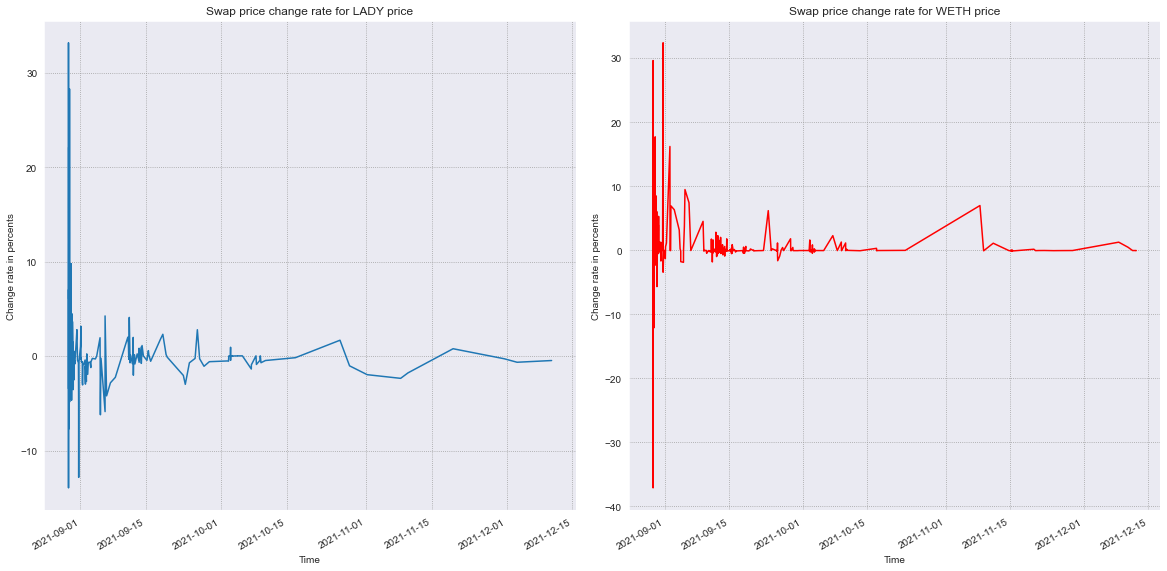

C:/workspace/data-science//libs\uniswap_v2_tools.py:235: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
C:/workspace/data-science//libs\uniswap_v2_tools.py:242: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)


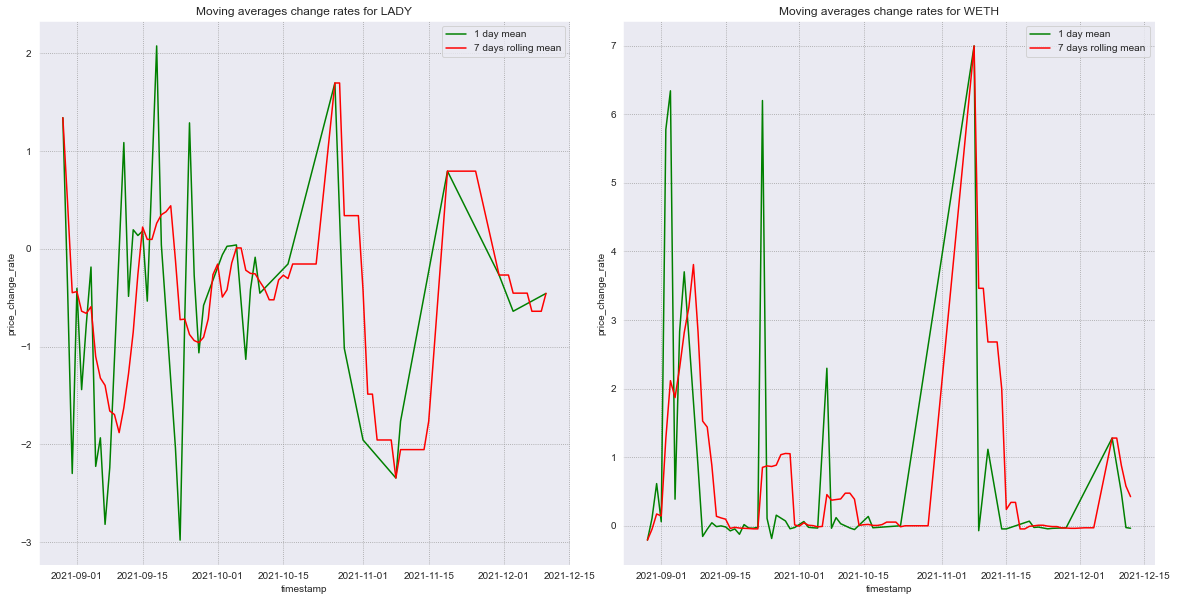

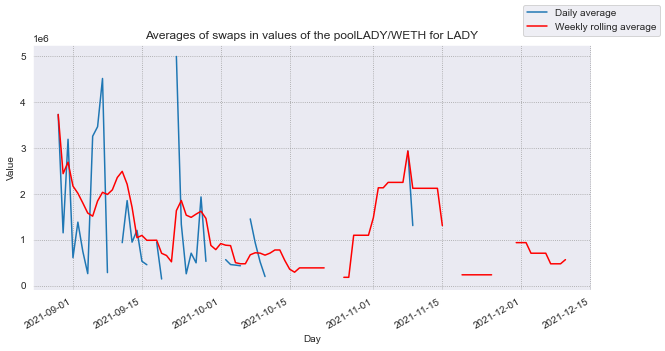

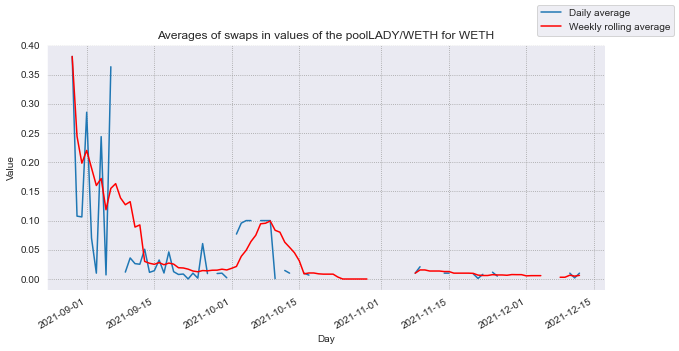

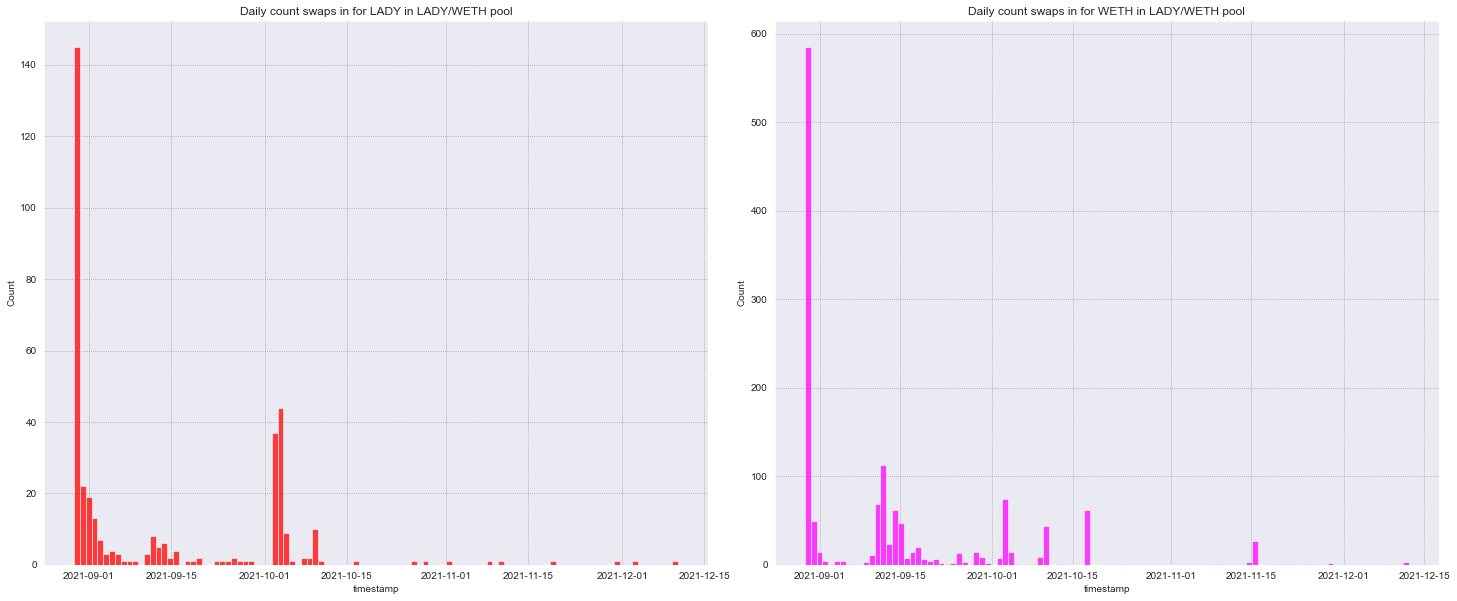

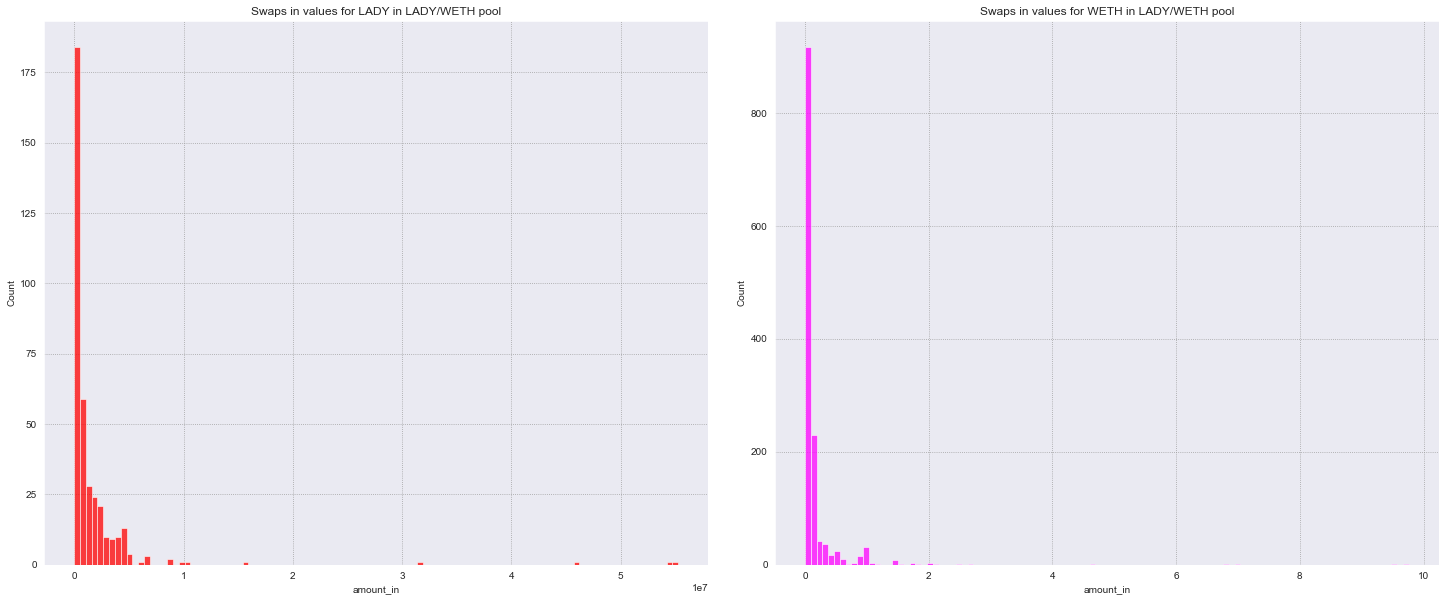

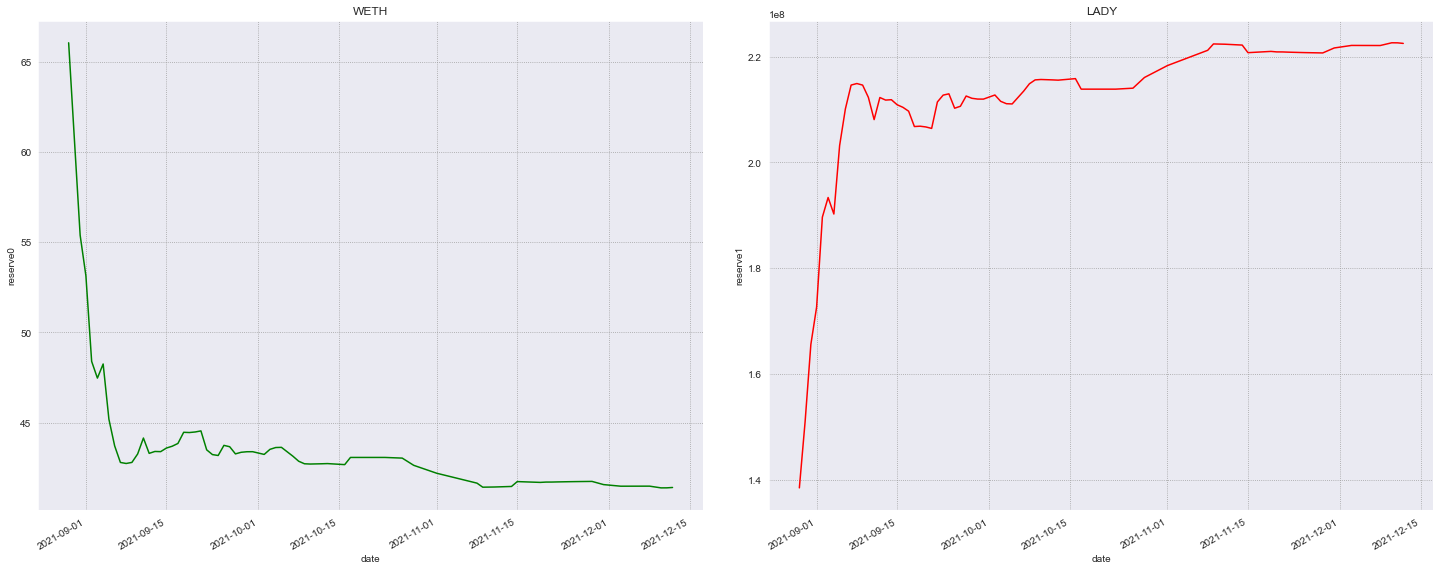

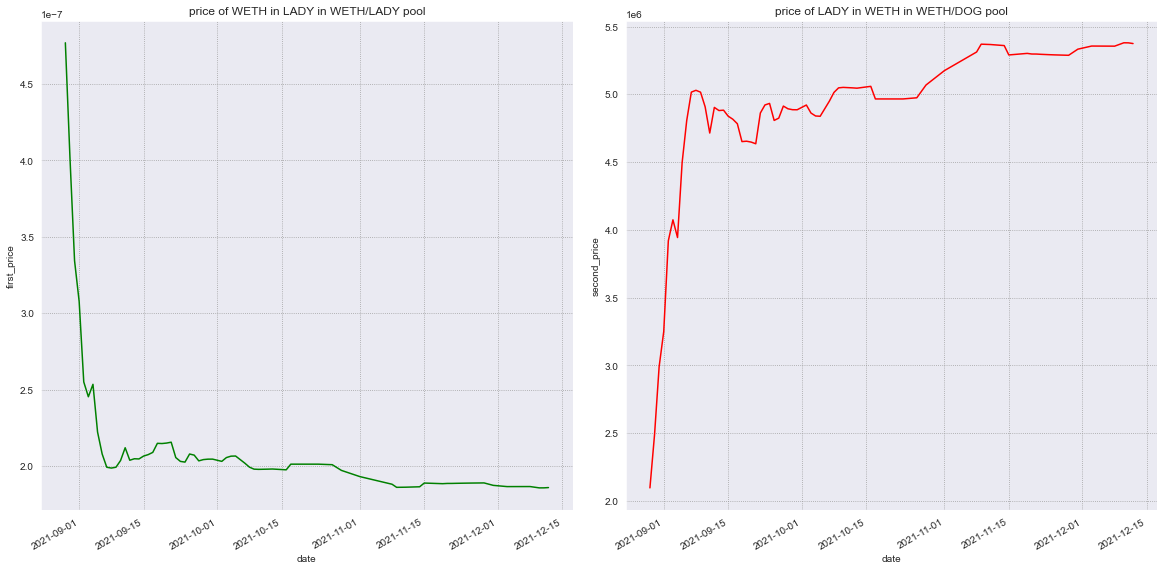

In [19]:
lady_weth_df = get_df_with_swap_prices_and_change_rates(lady_weth_df, 'LADY', 'WETH')

pyplot_line_swap_prices(lady_weth_df, 'LADY', 'WETH', xsize=20, ysize=10, wspace=0.1, hspace=0.1)

pyplot_line_swap_change_rate(lady_weth_df, 'LADY', 'WETH', xsize=20, ysize=10, wspace=0.1, hspace=0.1)

swaps_price_change_rates_moving_averages(lady_weth_df, 'LADY', 'WETH', 'Moving averages change rates for LADY',
                                           'Moving averages change rates for WETH', x_size=20, y_size=10, wspace=0.1, hspace=0.1)

show_swaps_amount_in_moving_averages(swaps_df=lady_weth_df[(lady_weth_df.token_in == 'LADY')], pool_name="LADY/WETH for LADY")
show_swaps_amount_in_moving_averages(swaps_df=lady_weth_df[(lady_weth_df.token_in == 'WETH')], pool_name="LADY/WETH for WETH")

# swapping values histograms
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.histplot(data=lady_weth_df[lady_weth_df.token_in == 'LADY'], x='timestamp', 
             bins=(lady_weth_df.timestamp[len(lady_weth_df) - 1] - lady_weth_df.timestamp[0]).days, 
             color='red').set_title("Daily count swaps in for LADY in LADY/WETH pool")
plt.subplot(1, 2, 2)
sns.histplot(data=lady_weth_df[lady_weth_df.token_in == 'WETH'], x='timestamp', 
             bins=(lady_weth_df.timestamp[len(lady_weth_df) - 1] - lady_weth_df.timestamp[0]).days, 
             color='magenta').set_title("Daily count swaps in for WETH in LADY/WETH pool")
plt.subplots_adjust(wspace=0.1)
plt.show()

# swapping in values distribution
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.histplot(data=lady_weth_df[lady_weth_df.token_in == 'LADY'], x='amount_in', 
             bins=(lady_weth_df.timestamp[len(lady_weth_df) - 1] - lady_weth_df.timestamp[0]).days, 
             color='red').set_title("Swaps in values for LADY in LADY/WETH pool")
plt.subplot(1, 2, 2)
sns.histplot(data=lady_weth_df[lady_weth_df.token_in == 'WETH'], x='amount_in', 
             bins=(lady_weth_df.timestamp[len(lady_weth_df) - 1] - lady_weth_df.timestamp[0]).days, 
             color='magenta').set_title("Swaps in values for WETH in LADY/WETH pool")
plt.subplots_adjust(wspace=0.1)
plt.show()

show_reserves_time_distribution(lady_weth_reserves_df, first_token_reserve_name="WETH", 
                                second_token_reserve_name="LADY", x=25, y=10, wspace=0.1)

show_reserve_price_distributions(lady_weth_reserves_df, first_token_price_name="price of WETH in LADY in WETH/LADY pool", 
                                        second_token_price_name="price of LADY in WETH in WETH/DOG pool", x=20, y=10, wspace=0.1)

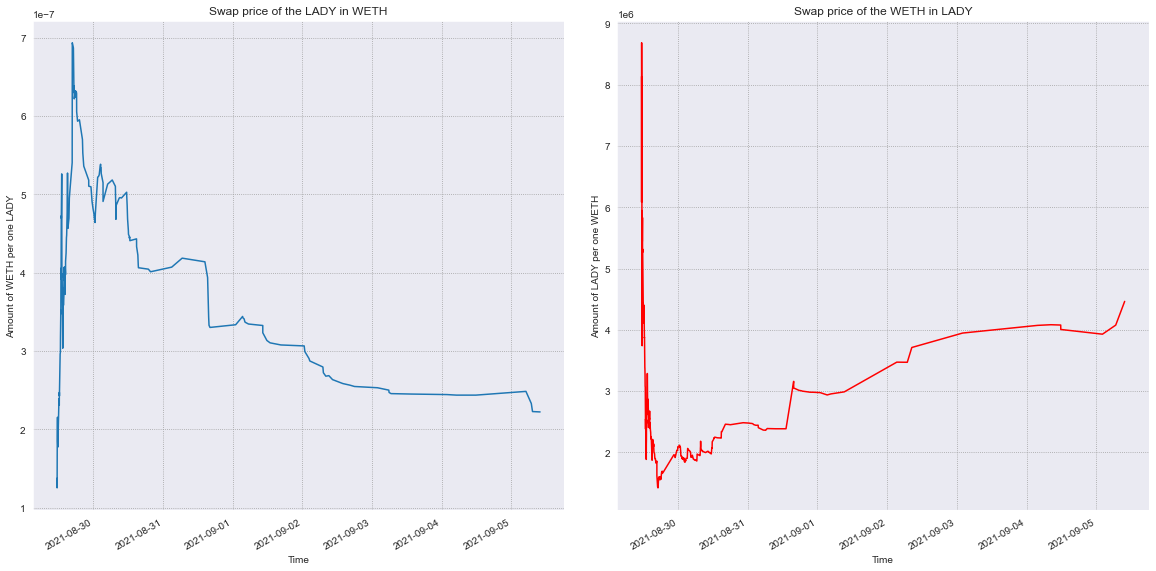

In [20]:
pyplot_line_swap_prices(lady_weth_df[lady_weth_df.timestamp < datetime(2021, 9, 6)], 'LADY', 'WETH', xsize=20, ysize=10, wspace=0.1, hspace=0.1)

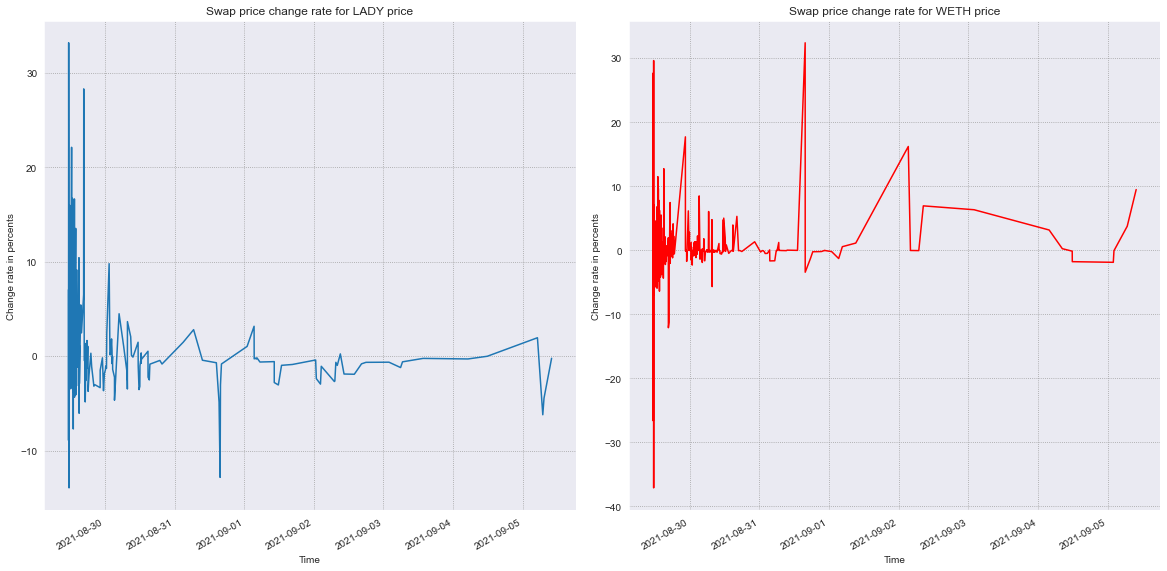

In [21]:
pyplot_line_swap_change_rate(lady_weth_df[lady_weth_df.timestamp < datetime(2021, 9, 6)], 'LADY', 'WETH', xsize=20, ysize=10, wspace=0.1, hspace=0.1)


In [22]:
lady_weth_df[lady_weth_df.price_change_rate < -30]

token_in token_out  amount_in    amount_out   amount_usd  \
38     WETH      LADY        0.5  1.870353e+06  1599.206305   

             timestamp                                      sender  \
38 2021-08-29 11:37:51  0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f   

                                            to  \
38  0xf47588a5a54a0a2a1de1863a88a120bbc0b4b777   

                                                  txd  first_to_second_price  \
38  0x24ca7673208624a4001b2ffb674bc3f729440666d552...           3.740705e+06   

    price_change_rate  
38         -37.099605

In [23]:
lady_weth_df[(lady_weth_df.index < 50) & (lady_weth_df.index > 30)][
    ['token_in', 'token_out', 'amount_in', 'amount_out', 'amount_usd', 'timestamp', 
     'first_to_second_price', 'price_change_rate']
]

token_in token_out     amount_in    amount_out    amount_usd  \
31     LADY      WETH  1.704775e+06  3.671787e-01   1175.158268   
32     WETH      LADY  1.000000e+00  4.550603e+06   3198.676772   
33     WETH      LADY  1.000000e-02  5.899570e+04     31.984126   
34     WETH      LADY  1.000000e-01  5.916212e+05    319.841261   
35     WETH      LADY  1.028308e-01  6.115380e+05    328.895243   
36     LADY      WETH  3.170277e+07  6.119274e+00  19573.578911   
37     LADY      WETH  4.609734e+07  9.893984e+00  31645.044338   
38     WETH      LADY  5.000000e-01  1.870353e+06   1599.206305   
39     WETH      LADY  9.761349e+00  4.609734e+07  31220.823300   
40     WETH      LADY  1.000000e+00  5.370542e+06   3198.396037   
41     LADY      WETH  5.867906e+06  1.083816e+00   3466.472847   
42     WETH      LADY  1.039001e+00  5.867906e+06   3323.138167   
43     WETH      LADY  1.000000e-01  5.512833e+05    319.826243   
44     WETH      LADY  4.000000e-01  2.178250e+06   1279.479022   
45     LADY      WETH  8.841136e+06  1.567308e+00   5013.382876   
46     WETH      LADY  3.000000e-03  1.749223e+04      9.583144   
47     WETH      LADY  1.000000e-03  5.830152e+03      3.194725   
48     WETH      LADY  1.773740e+00  9.896196e+06   5666.610104   
49     WETH      LADY  1.000000e-01  5.655276e+05    319.491329   

             timestamp  first_to_second_price  price_change_rate  
31 2021-08-29 11:35:58           2.153825e-07           9.424711  
32 2021-08-29 11:37:43           4.550603e+06          -5.772733  
33 2021-08-29 11:37:46           5.899570e+06          29.643694  
34 2021-08-29 11:37:46           5.916212e+06           0.282095  
35 2021-08-29 11:37:46           5.947030e+06           0.520906  
36 2021-08-29 11:37:46           1.930202e-07         -10.382600  
37 2021-08-29 11:37:51           2.146324e-07          11.196873  
38 2021-08-29 11:37:51           3.740705e+06         -37.099605  
39 2021-08-29 11:37:51           4.722436e+06          26.244524  
40 2021-08-29 11:38:14           5.370542e+06          13.723992  
41 2021-08-29 11:38:14           1.847024e-07         -13.944796  
42 2021-08-29 11:38:14           5.647639e+06           5.159573  
43 2021-08-29 11:39:37           5.512833e+06          -2.386945  
44 2021-08-29 11:40:46           5.445625e+06          -1.219123  
45 2021-08-29 11:42:42           1.772745e-07          -4.021530  
46 2021-08-29 11:44:15           5.830745e+06           7.072092  
47 2021-08-29 11:45:19           5.830152e+06          -0.010157  
48 2021-08-29 11:45:47           5.579283e+06          -4.302960  
49 2021-08-29 11:45:47           5.655276e+06           1.362043

# CAT/WETH

In [24]:
cat_weth_df = pd.read_pickle(os.getcwd() + '\\pkl_stories\\cat_weth_swaps.pkl')
cat_weth_mints_df = pd.read_pickle(os.getcwd() + "\\pkl_stories\\cat_weth_mints.pkl")
# cat_weth_burns_df = pd.read_pickle(os.getcwd() + "\\pkl_stories\\cat_weth_burns.pkl")
cat_weth_reserves_df = pd.read_pickle(os.getcwd() + "\\pkl_stories\\cat_weth_reserves.pkl")

C:\Users\Zbook\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


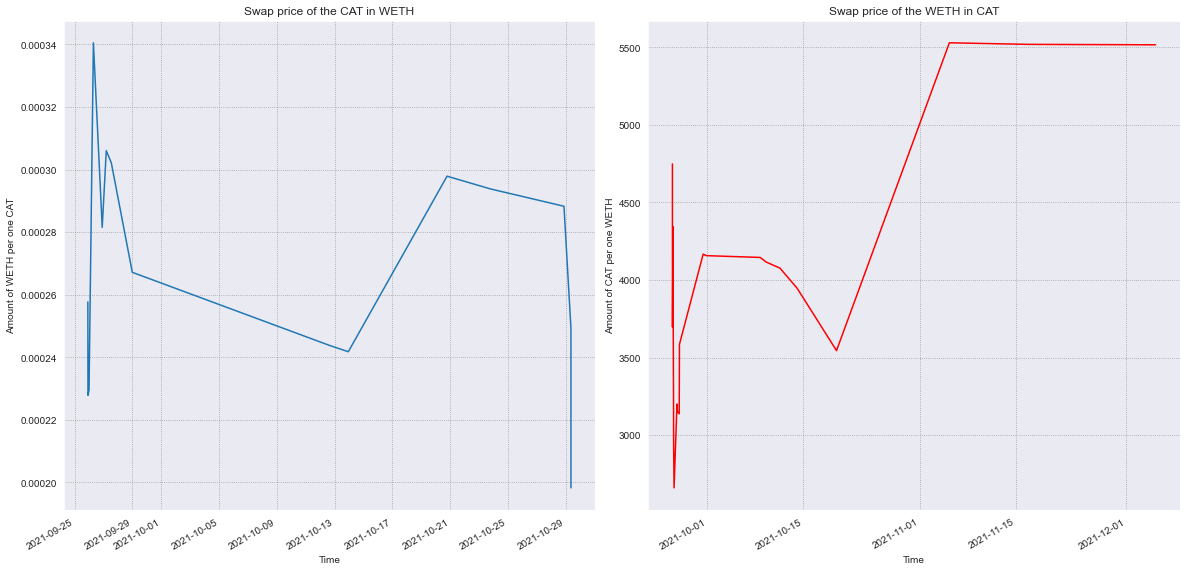

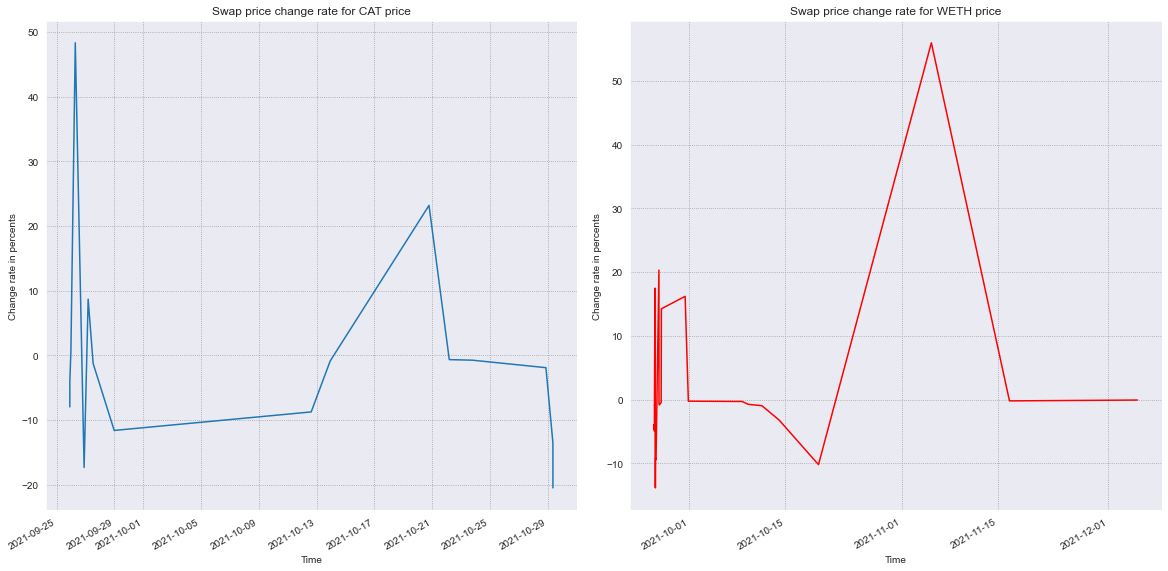

C:/workspace/data-science//libs\uniswap_v2_tools.py:235: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
C:/workspace/data-science//libs\uniswap_v2_tools.py:242: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)


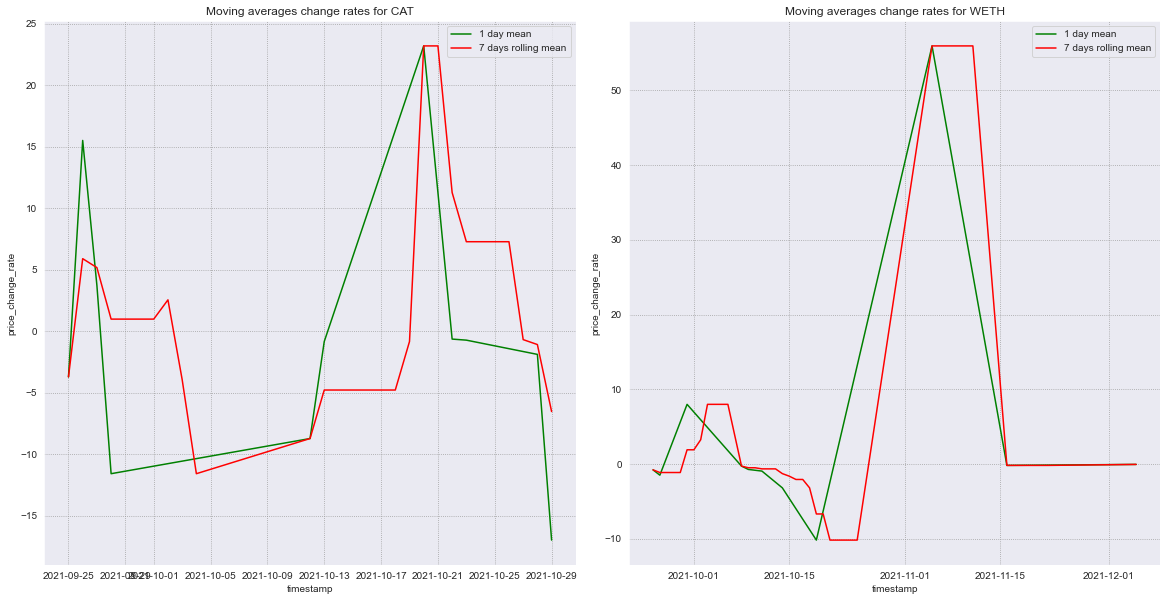

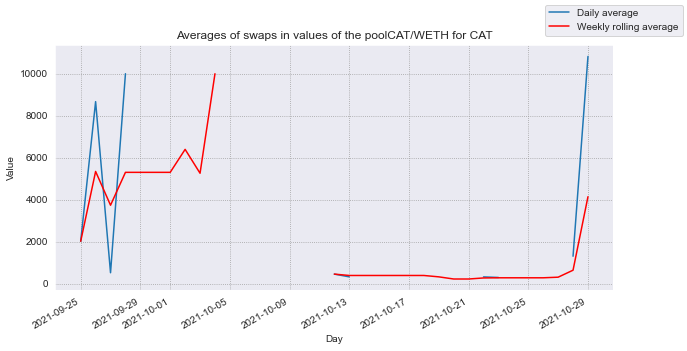

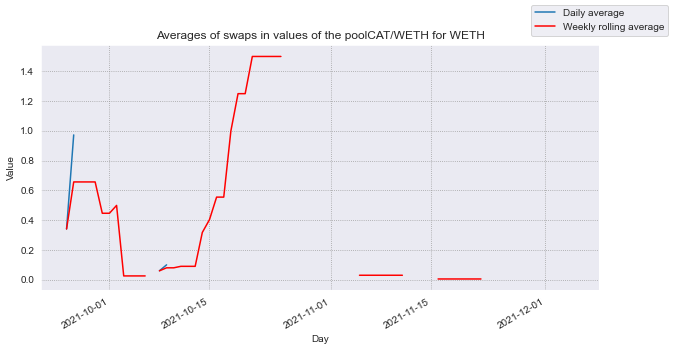

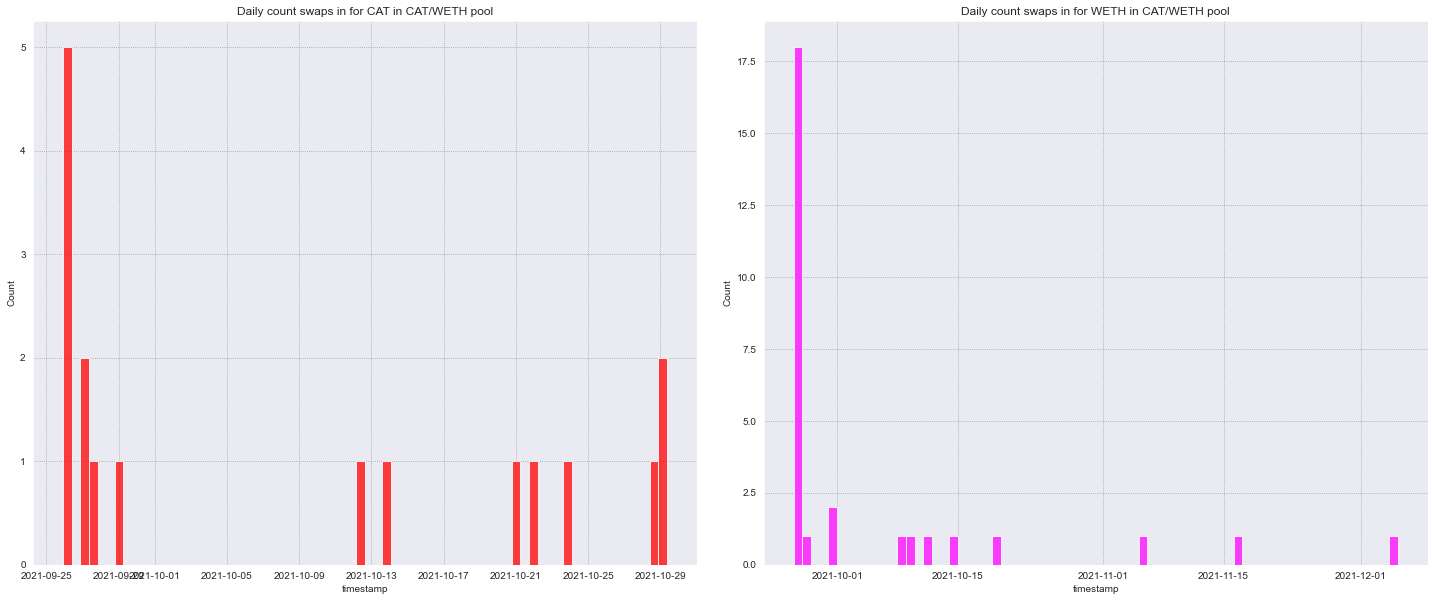

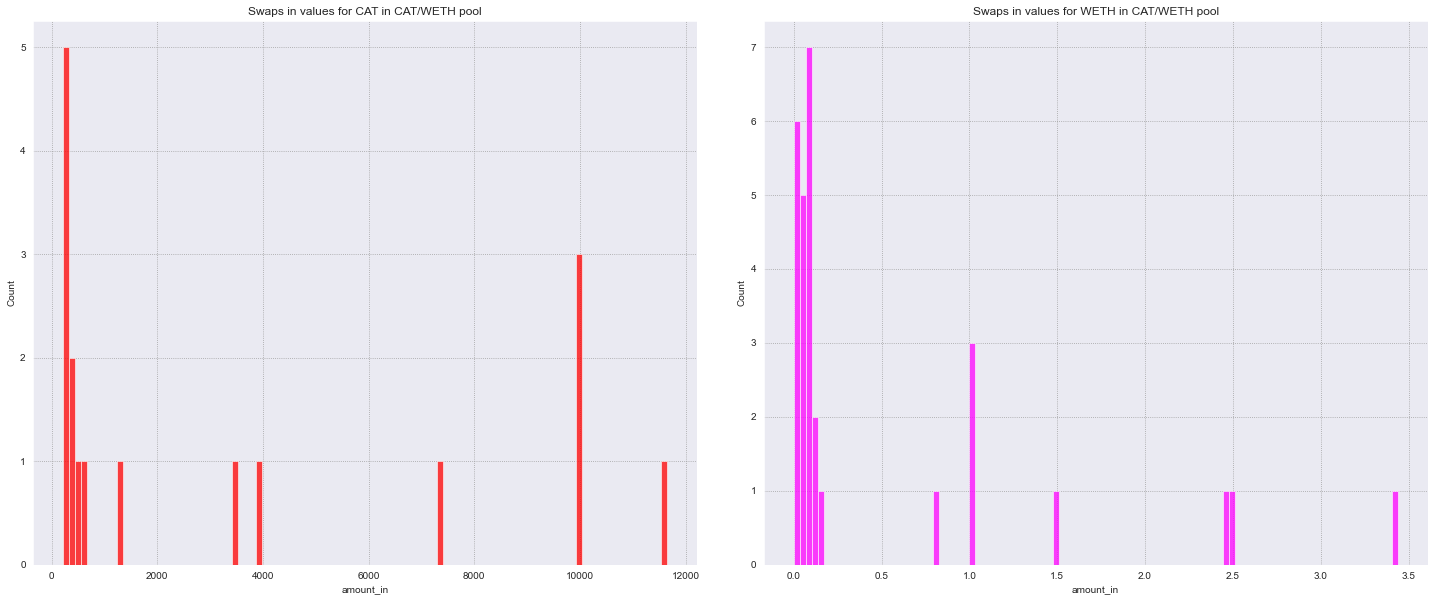

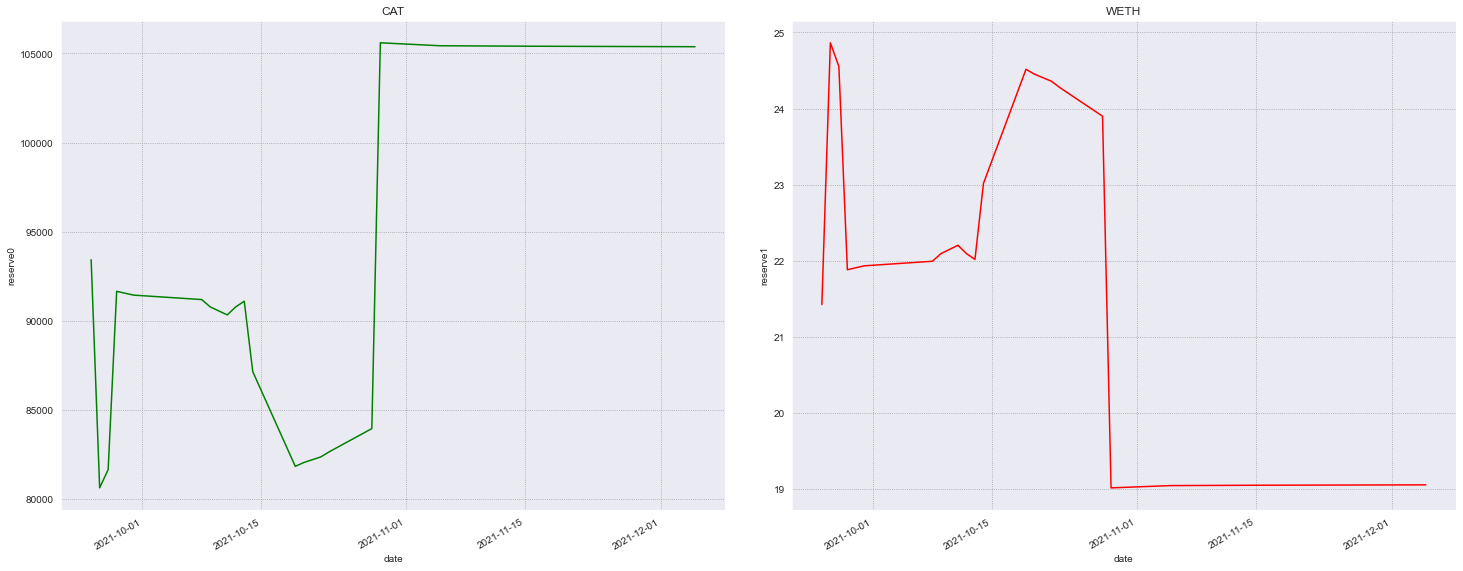

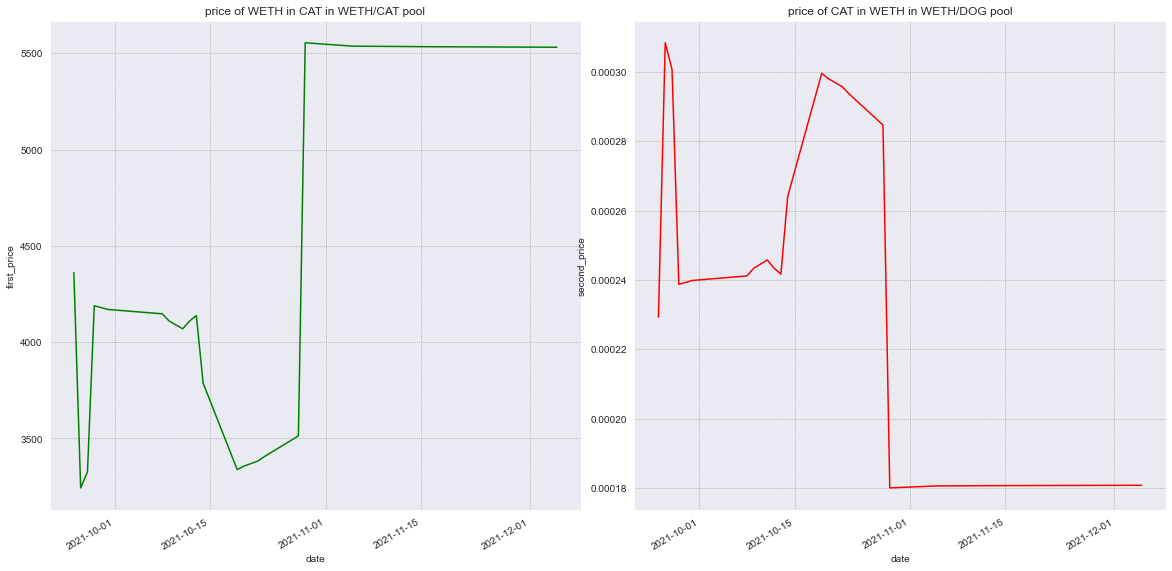

In [25]:
cat_weth_df = get_df_with_swap_prices_and_change_rates(cat_weth_df, 'CAT', 'WETH')

pyplot_line_swap_prices(cat_weth_df, 'CAT', 'WETH', xsize=20, ysize=10, wspace=0.1, hspace=0.1)

pyplot_line_swap_change_rate(cat_weth_df, 'CAT', 'WETH', xsize=20, ysize=10, wspace=0.1, hspace=0.1)

swaps_price_change_rates_moving_averages(cat_weth_df, 'CAT', 'WETH', 'Moving averages change rates for CAT',
                                           'Moving averages change rates for WETH', x_size=20, y_size=10, wspace=0.1, hspace=0.1)

show_swaps_amount_in_moving_averages(swaps_df=cat_weth_df[(cat_weth_df.token_in == 'CAT')], pool_name="CAT/WETH for CAT")
show_swaps_amount_in_moving_averages(swaps_df=cat_weth_df[(cat_weth_df.token_in == 'WETH')], pool_name="CAT/WETH for WETH")

# swapping values histograms
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.histplot(data=cat_weth_df[cat_weth_df.token_in == 'CAT'], x='timestamp', 
             bins=(cat_weth_df.timestamp[len(cat_weth_df) - 1] - cat_weth_df.timestamp[0]).days, 
             color='red').set_title("Daily count swaps in for CAT in CAT/WETH pool")
plt.subplot(1, 2, 2)
sns.histplot(data=cat_weth_df[cat_weth_df.token_in == 'WETH'], x='timestamp',
             bins=(cat_weth_df.timestamp[len(cat_weth_df) - 1] - cat_weth_df.timestamp[0]).days, 
             color='magenta').set_title("Daily count swaps in for WETH in CAT/WETH pool")
plt.subplots_adjust(wspace=0.1)
plt.show()

# swapping in values distribution
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.histplot(data=cat_weth_df[cat_weth_df.token_in == 'CAT'], x='amount_in', bins=100, 
             color='red').set_title("Swaps in values for CAT in CAT/WETH pool")
plt.subplot(1, 2, 2)
sns.histplot(data=cat_weth_df[cat_weth_df.token_in == 'WETH'], x='amount_in', bins=100, 
             color='magenta').set_title("Swaps in values for WETH in CAT/WETH pool")
plt.subplots_adjust(wspace=0.1)
plt.show()

show_reserves_time_distribution(cat_weth_reserves_df, first_token_reserve_name="CAT", 
                                           second_token_reserve_name="WETH", x=25, y=10, wspace=0.1)

show_reserve_price_distributions(cat_weth_reserves_df, first_token_price_name="price of WETH in CAT in WETH/CAT pool", 
                                        second_token_price_name="price of CAT in WETH in WETH/DOG pool", x=20, y=10, wspace=0.1)

# TIARA/WETH

In [14]:
tiara_weth_df = pd.read_pickle(os.getcwd() + '\\pkl_stories\\tiara_weth_swaps.pkl')
tiara_weth_mints_df = pd.read_pickle(os.getcwd() + "\\pkl_stories\\tiara_weth_mints.pkl")
tiara_weth_burns_df = pd.read_pickle(os.getcwd() + "\\pkl_stories\\tiara_weth_burns.pkl")
tiara_weth_reserves_df = pd.read_pickle(os.getcwd() + "\\pkl_stories\\tiara_weth_reserves.pkl")

C:\Users\Zbook\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


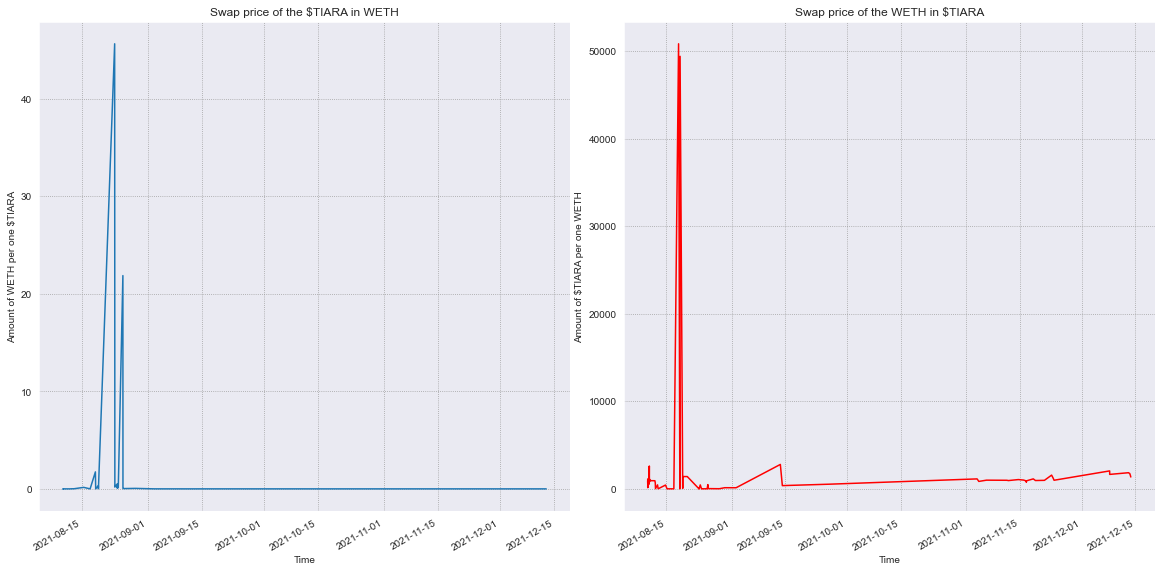

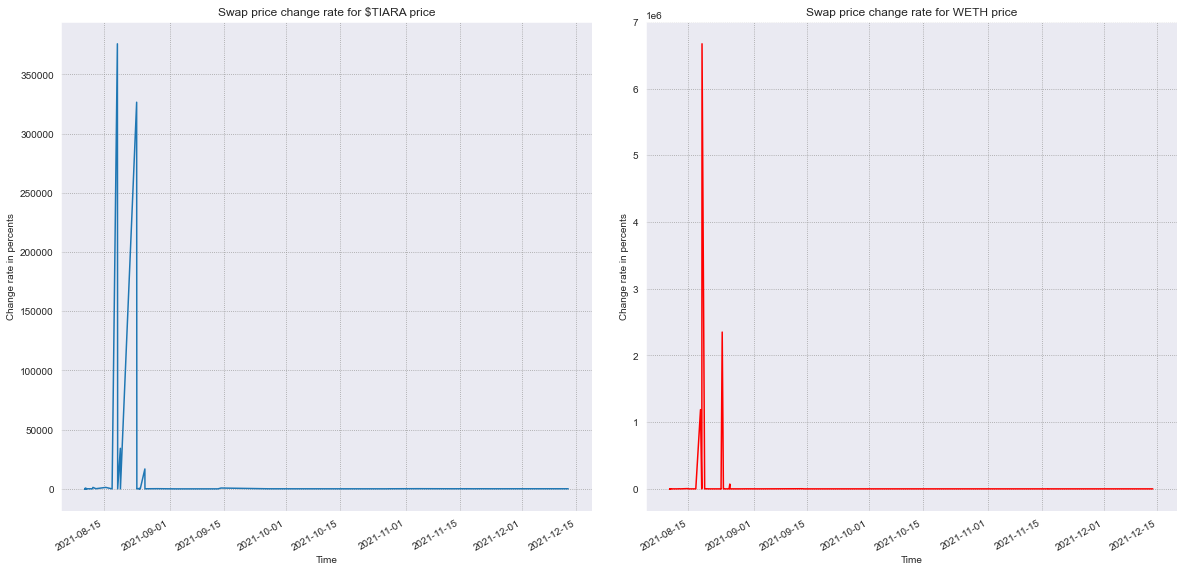

C:/workspace/data-science//libs\uniswap_v2_tools.py:235: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
C:/workspace/data-science//libs\uniswap_v2_tools.py:242: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)


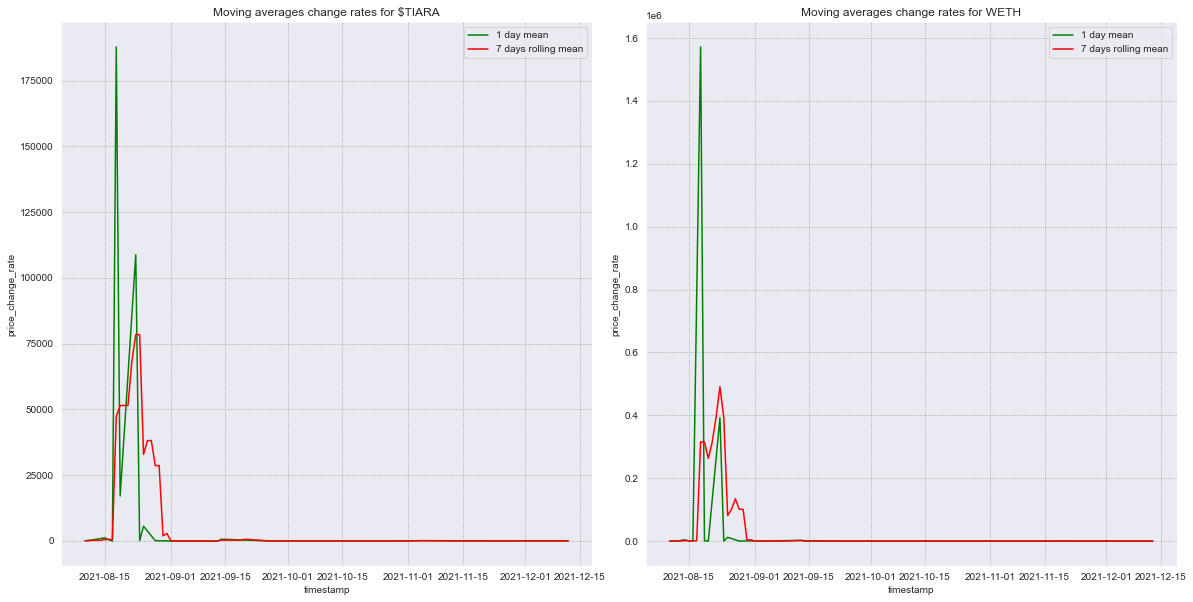

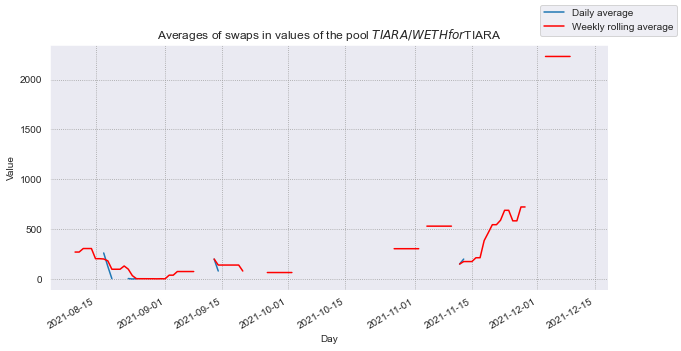

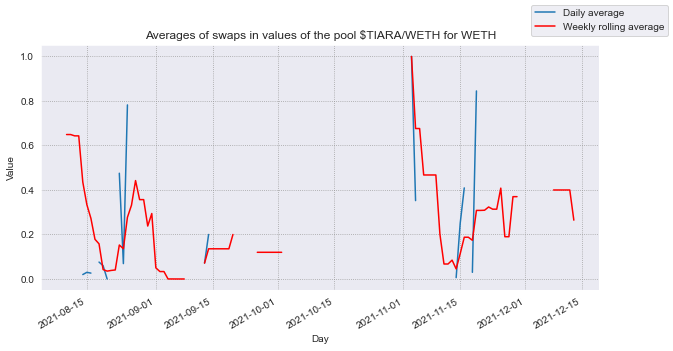

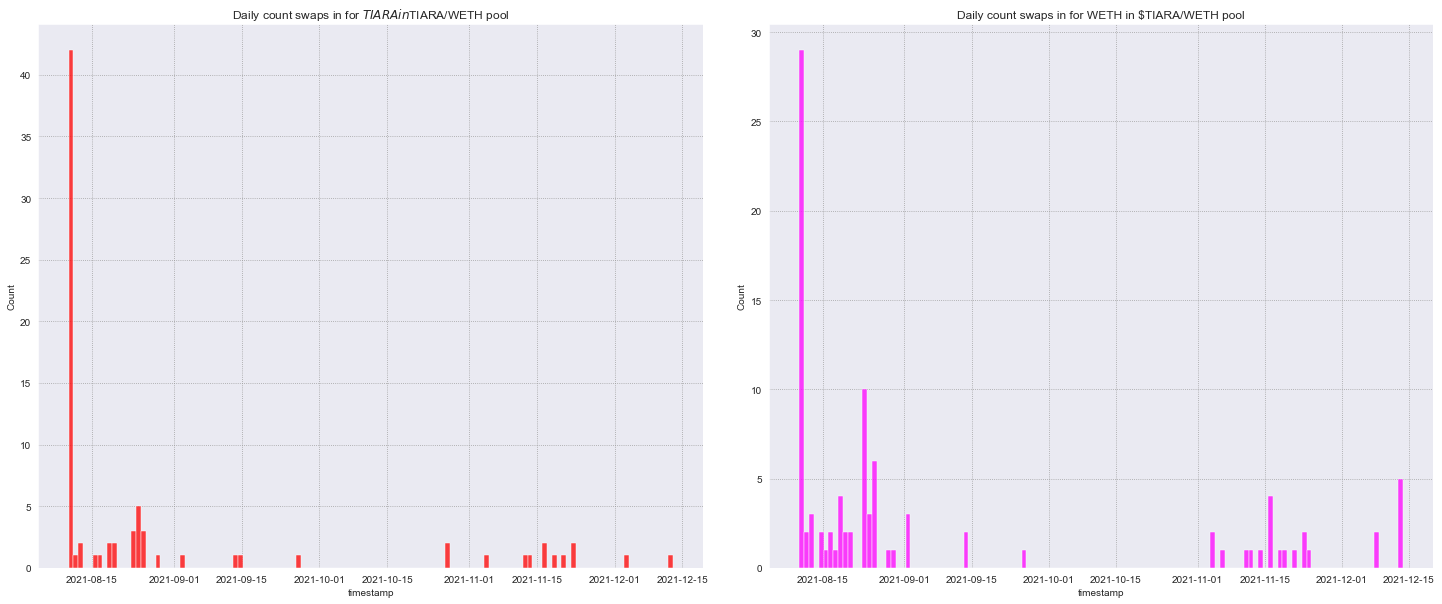

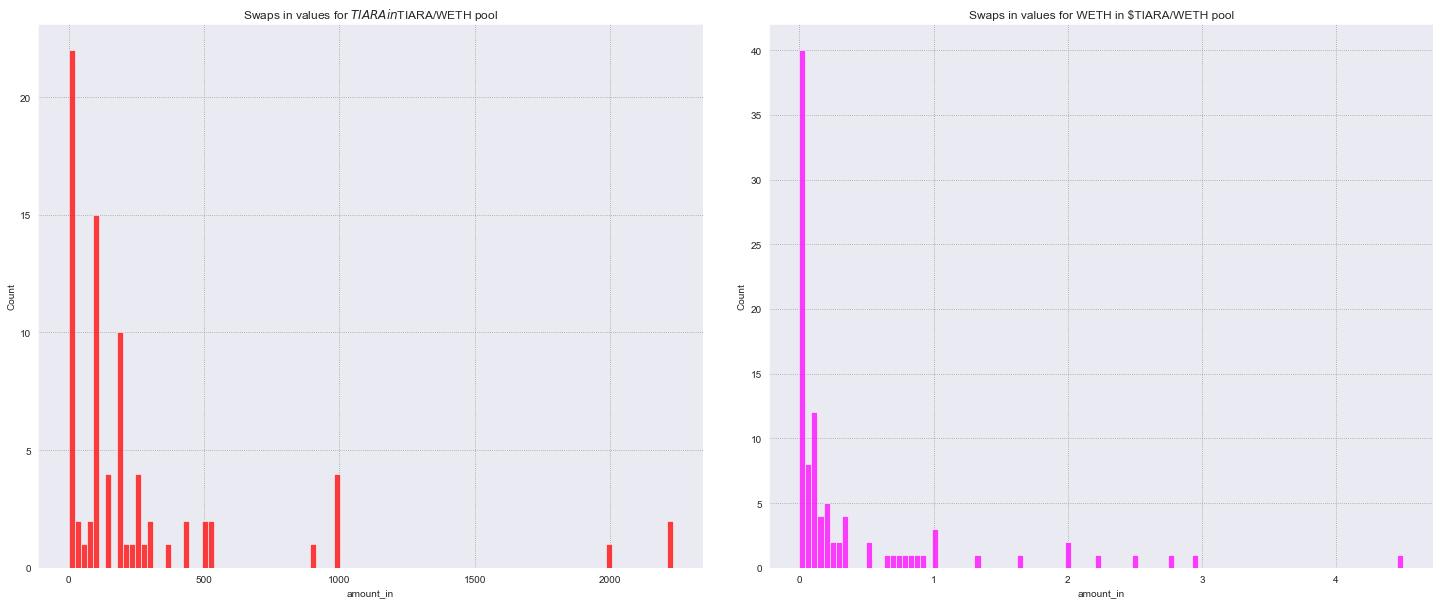

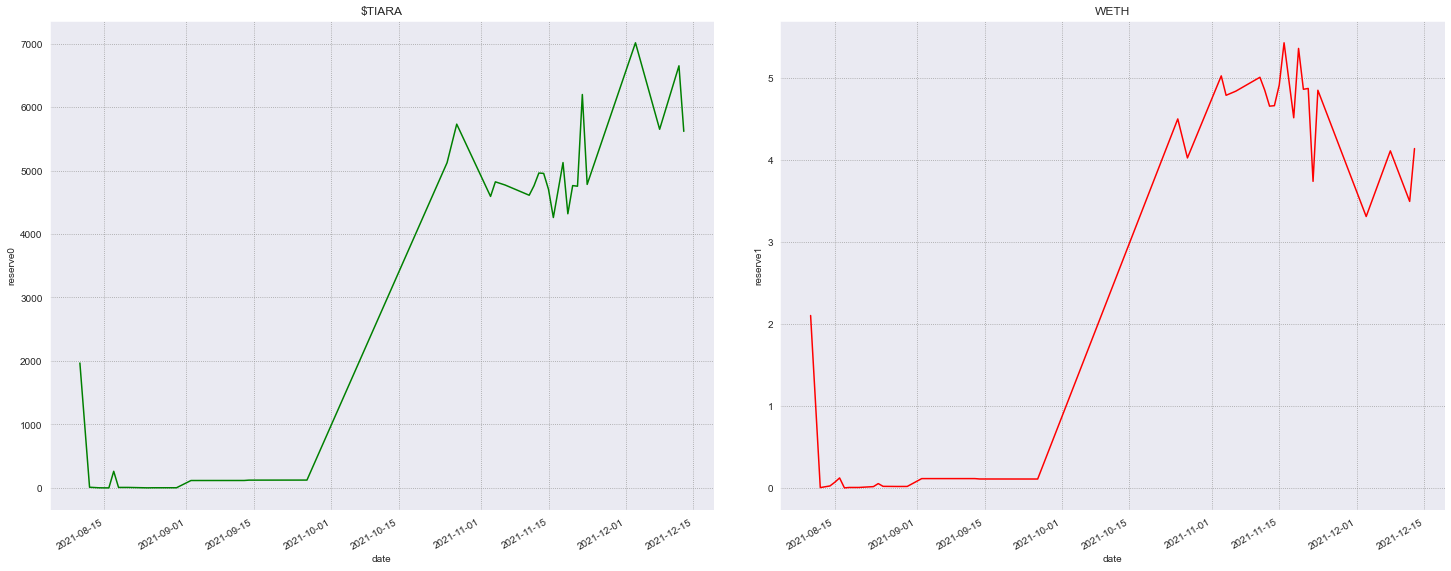

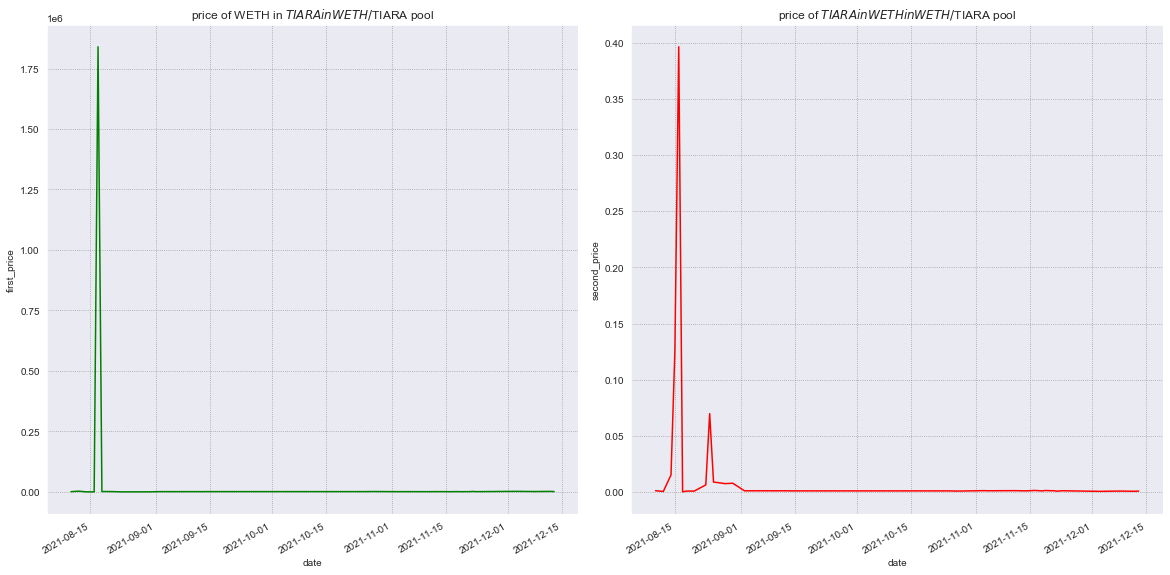

In [15]:
tiara_weth_df = get_df_with_swap_prices_and_change_rates(tiara_weth_df, '$TIARA', 'WETH')

pyplot_line_swap_prices(tiara_weth_df, '$TIARA', 'WETH', xsize=20, ysize=10, wspace=0.1, hspace=0.1)

pyplot_line_swap_change_rate(tiara_weth_df, '$TIARA', 'WETH', xsize=20, ysize=10, wspace=0.1, hspace=0.1)

swaps_price_change_rates_moving_averages(tiara_weth_df, '$TIARA', 'WETH', 'Moving averages change rates for $TIARA',
                                          'Moving averages change rates for WETH', x_size=20, y_size=10, wspace=0.1, hspace=0.1)

show_swaps_amount_in_moving_averages(swaps_df=tiara_weth_df[(tiara_weth_df.token_in == '$TIARA')], pool_name="$TIARA/WETH for $TIARA")
show_swaps_amount_in_moving_averages(swaps_df=tiara_weth_df[(tiara_weth_df.token_in == 'WETH')], pool_name="$TIARA/WETH for WETH")

# swapping values histograms
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.histplot(data=tiara_weth_df[tiara_weth_df.token_in == '$TIARA'], x='timestamp', 
             bins=(tiara_weth_df.timestamp[len(tiara_weth_df) - 1] - tiara_weth_df.timestamp[0]).days, 
             color='red').set_title("Daily count swaps in for $TIARA in $TIARA/WETH pool")
plt.subplot(1, 2, 2)
sns.histplot(data=tiara_weth_df[tiara_weth_df.token_in == 'WETH'], x='timestamp', 
             bins=(tiara_weth_df.timestamp[len(tiara_weth_df) - 1] - tiara_weth_df.timestamp[0]).days, 
             color='magenta').set_title("Daily count swaps in for WETH in $TIARA/WETH pool")
plt.subplots_adjust(wspace=0.1)
plt.show()

# swapping in values distribution
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.histplot(data=tiara_weth_df[tiara_weth_df.token_in == '$TIARA'], x='amount_in', 
             bins=100, color='red').set_title("Swaps in values for $TIARA in $TIARA/WETH pool")
plt.subplot(1, 2, 2)
sns.histplot(data=tiara_weth_df[tiara_weth_df.token_in == 'WETH'], x='amount_in', 
             bins=100, color='magenta').set_title("Swaps in values for WETH in $TIARA/WETH pool")
plt.subplots_adjust(wspace=0.1)
plt.show()

show_reserves_time_distribution(tiara_weth_reserves_df,first_token_reserve_name="$TIARA", 
                                           second_token_reserve_name="WETH", x=25, y=10, wspace=0.1)

show_reserve_price_distributions(tiara_weth_reserves_df, first_token_price_name="price of WETH in $TIARA in WETH/$TIARA pool", 
                                        second_token_price_name="price of $TIARA in WETH in WETH/$TIARA pool", x=20, y=10, wspace=0.1)

In [16]:
tiara_weth_mints_df

amount0   amount1     amountUSD  liquidity           timestamp
0  2000.000000  2.000000   6243.881846  63.245553 2021-08-10 03:35:13
1    39.088231  0.300000   1138.458261   0.001600 2021-09-02 00:43:52
2  5000.000000  4.387672  18491.413883   0.003633 2021-10-25 23:19:12

In [17]:
tiara_weth_burns_df

amount0   amount1     amountUSD  liquidity           timestamp
0  950.479833  4.336116  13972.141243  63.245553 2021-08-12 04:11:32

In [18]:
tiara_weth_reserves_df

reserve0  reserve1    reserveUSD  dailyVolumeToken0  dailyVolumeToken1  \
0   1967.782721  2.100429   6573.720495       2.273676e+04       3.755215e+01   
1     10.286852  0.003576     10.733163       3.051829e+03       4.132937e+00   
2      1.564302  0.023576     76.690037       8.722550e+00       2.000000e-02   
3      0.542384  0.068205    214.897748       1.221918e+00       7.537129e-02   
4      0.305629  0.121205    386.071696       2.367550e-01       5.300000e-02   
5    261.451183  0.000142      0.452966       2.611456e+02       1.210626e-01   
6      7.316531  0.005148     15.706874       7.626861e+02       7.550970e-01   
7      7.316531  0.005180     15.506547       1.402965e+01       2.400641e-01   
8      7.316530  0.005180     16.657749       2.816314e-07       2.000000e-10   
9      2.493851  0.015487     51.312951       3.282459e+01       5.693467e+00   
10     0.751724  0.052392    174.540191       6.642126e+00       9.321202e-01   
11     2.137985  0.018740     60.138399       2.012653e+01       9.421346e+00   
12     2.338280  0.017222     55.643691       3.799705e+00       2.015177e-01   
13     2.290712  0.017581     55.622301       4.756808e-02       3.587097e-04   
14   116.340009  0.113174    427.581972       7.503893e+01       2.050070e-01   
15   116.782345  0.113174    362.994140       3.995577e+02       1.429461e-01   
16   122.283522  0.108503    356.671093       1.544988e+02       4.046709e-01   
17   123.157105  0.108075    323.894090       1.291264e+02       2.404285e-01   
18  5123.157105  4.495747  18946.883683       0.000000e+00       0.000000e+00   
19  5730.796838  4.020373  16104.532936       6.076397e+02       4.753735e-01   
20  4592.032692  5.020373  23251.292901       1.138764e+03       1.000000e+00   
21  4821.752310  4.783709  43716.482090       8.302804e+02       9.412974e-01   
22  4772.024074  4.833709  43559.176423       4.972824e+01       5.000000e-02   
23  4610.749269  5.003292  47467.305528       1.612748e+02       1.695832e-01   
24  4760.749269  4.846108  44575.259950       1.500000e+02       1.571839e-01   
25  4960.749269  4.651293  42892.730643       2.000000e+02       1.948155e-01   
26  4954.377474  4.657293  43008.533526       6.371796e+00       6.000000e-03   
27  4702.004822  4.908018  44835.619490       2.523727e+02       2.507250e-01   
28  4259.547683  5.423572  46790.187205       1.602337e+03       1.940572e+00   
29  5125.328198  4.509862  38010.107584       9.342195e+02       9.737105e-01   
30  4318.587420  5.354869  42753.220075       8.067408e+02       8.450071e-01   
31  4762.587420  4.857011  42822.285373       4.440000e+02       4.978580e-01   
32  4752.831270  4.867011  42330.436578       9.756150e+00       1.000000e-02   
33  6197.631270  3.735173  30634.158978       1.444800e+03       1.131838e+00   
34  4781.219391  4.845173  42145.429874       1.416412e+03       1.110000e+00   
35  7012.447303  3.306687  30334.891416       2.231228e+03       1.538486e+00   
36  5649.779394  4.106687  35789.247012       1.362668e+03       8.000000e-01   
37  6649.779394  3.490695  28945.619840       1.000000e+03       6.159927e-01   
38  5616.818031  4.134646  31157.580738       1.032961e+03       6.439517e-01   

         date token0 token1     volumeUSD   first_price  second_price  
0  2021-08-10     {}     {}  1.174428e+05  9.368479e+02  1.067409e-03  
1  2021-08-12     {}     {}  1.326659e+04  2.876604e+03  3.476321e-04  
2  2021-08-14     {}     {}  6.505761e+01  6.635135e+01  1.507128e-02  
3  2021-08-15     {}     {}  2.427866e+02  7.952291e+00  1.257499e-01  
4  2021-08-16     {}     {}  1.690899e+02  2.521593e+00  3.965748e-01  
5  2021-08-17     {}     {}  3.858767e+02  1.839771e+06  5.435460e-07  
6  2021-08-18     {}     {}  2.284059e+03  1.421336e+03  7.035632e-04  
7  2021-08-19     {}     {}  7.187286e+02  1.412394e+03  7.080175e-04  
8  2021-08-20     {}     {}  6.431250e-07  1.412394e+03  7.080176e-04  
9  2021-08-23     {}     {}  1.900842e+04  1.6

# ACAB/WETH

In [28]:
acab_weth_df = pd.read_pickle(os.getcwd() + '\\pkl_stories\\acab_weth_swaps.pkl')
acab_weth_mints_df = pd.read_pickle(os.getcwd() + "\\pkl_stories\\acab_weth_mints.pkl")
# acab_weth_burns_df = pd.read_pickle(os.getcwd() + "\\pkl_stories\\acab_weth_burns.pkl")
acab_weth_reserves_df = pd.read_pickle(os.getcwd() + "\\pkl_stories\\acab_weth_reserves.pkl")

C:\Users\Zbook\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


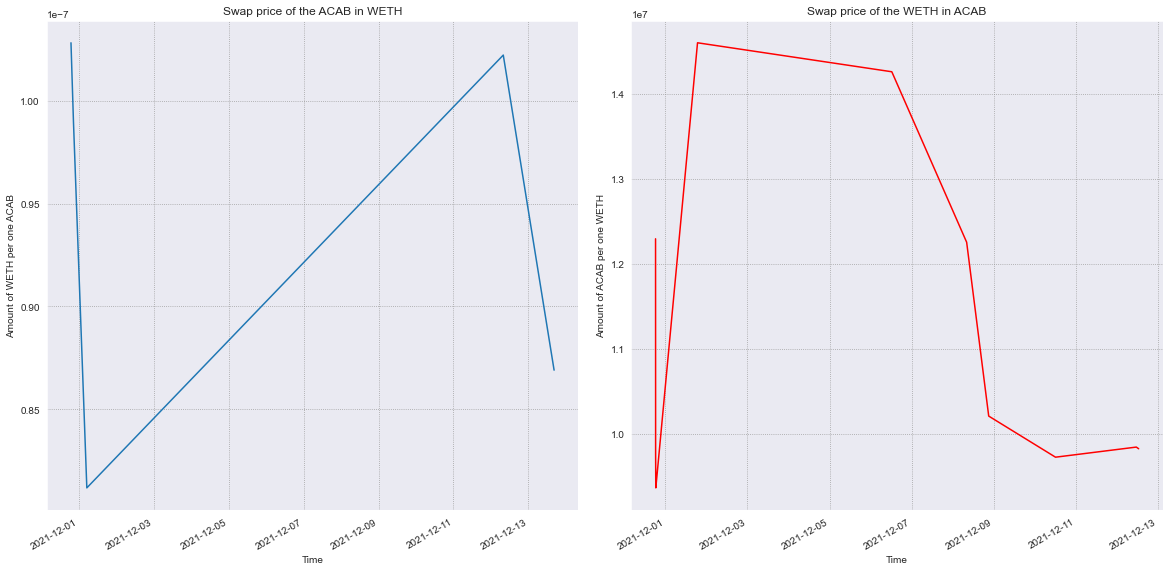

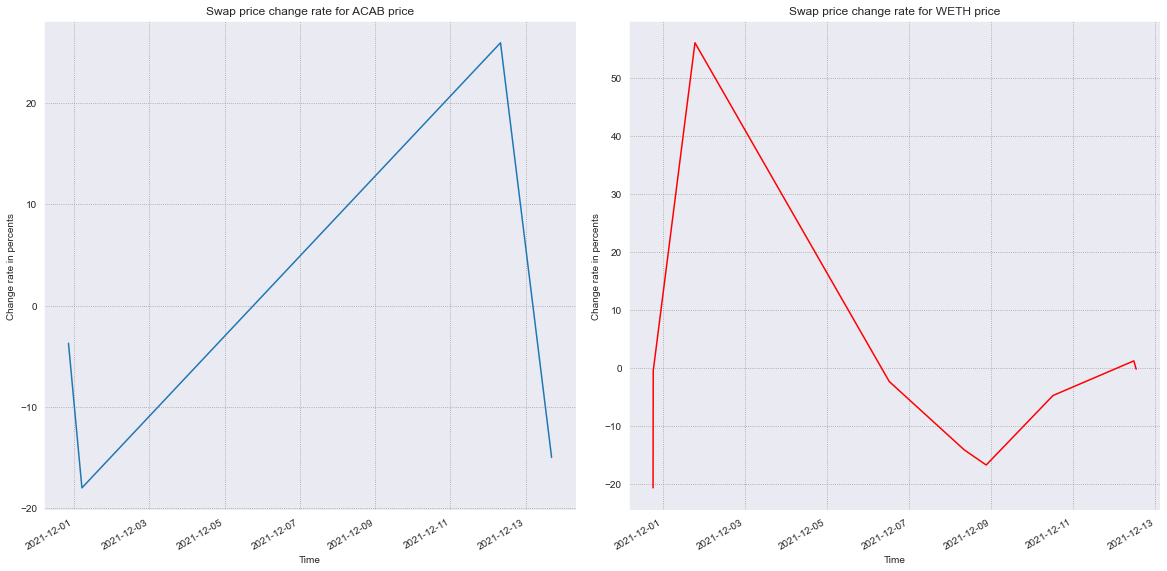

C:/workspace/data-science//libs\uniswap_v2_tools.py:235: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
C:/workspace/data-science//libs\uniswap_v2_tools.py:242: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)


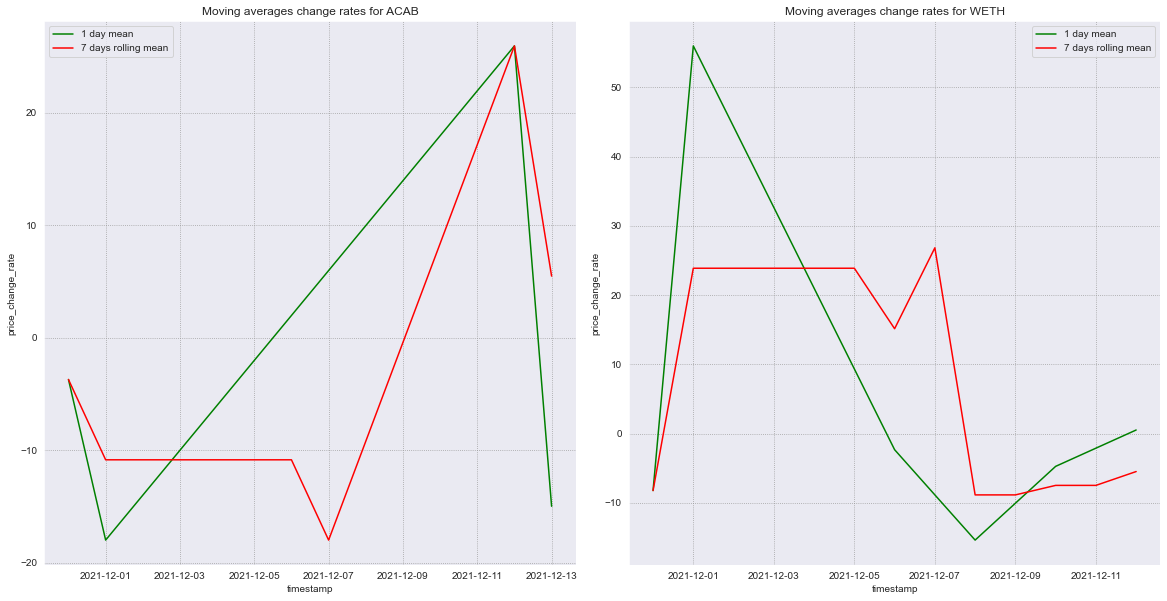

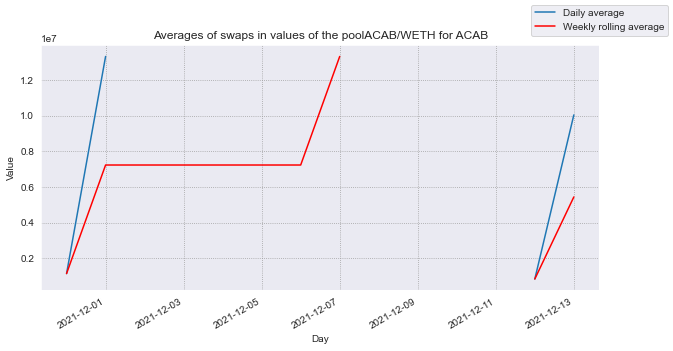

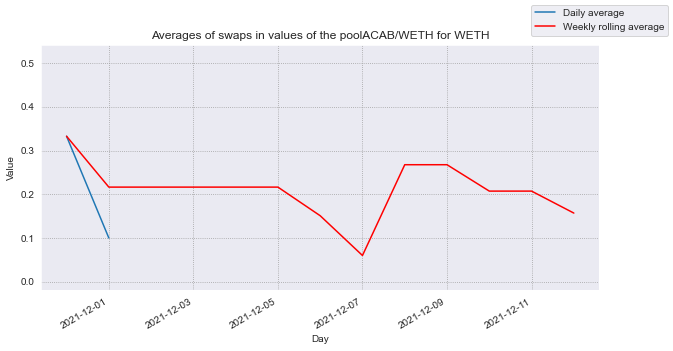

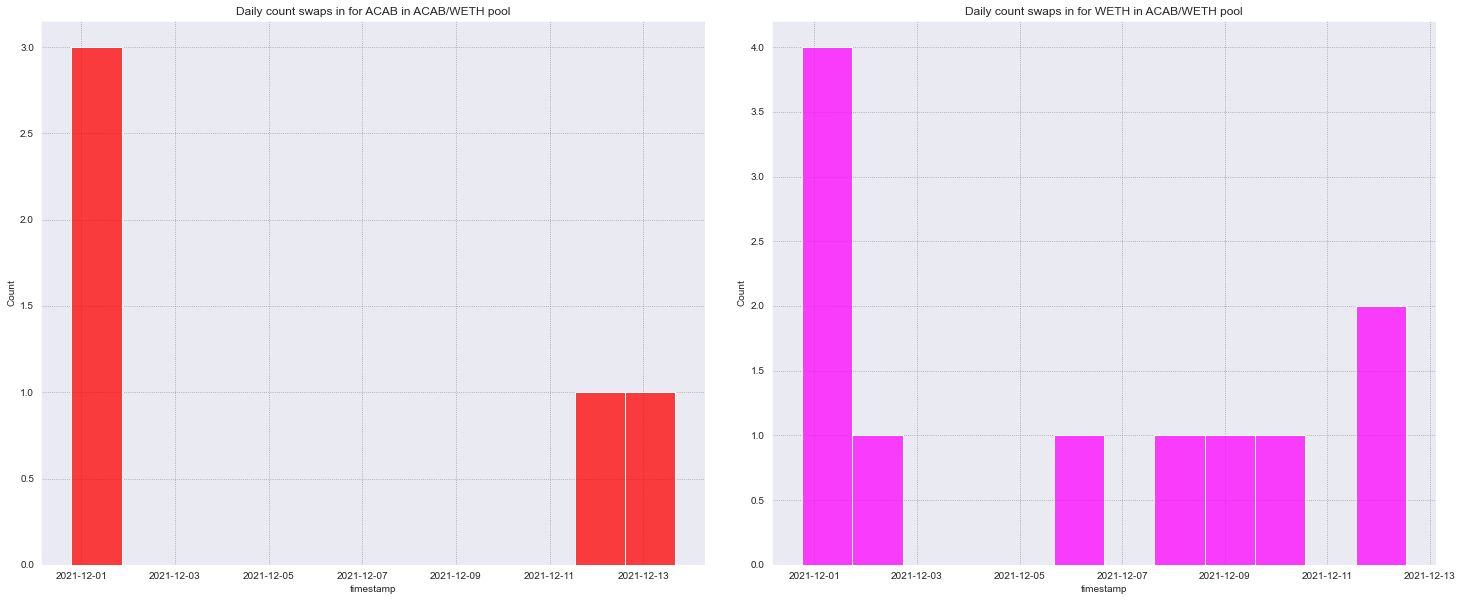

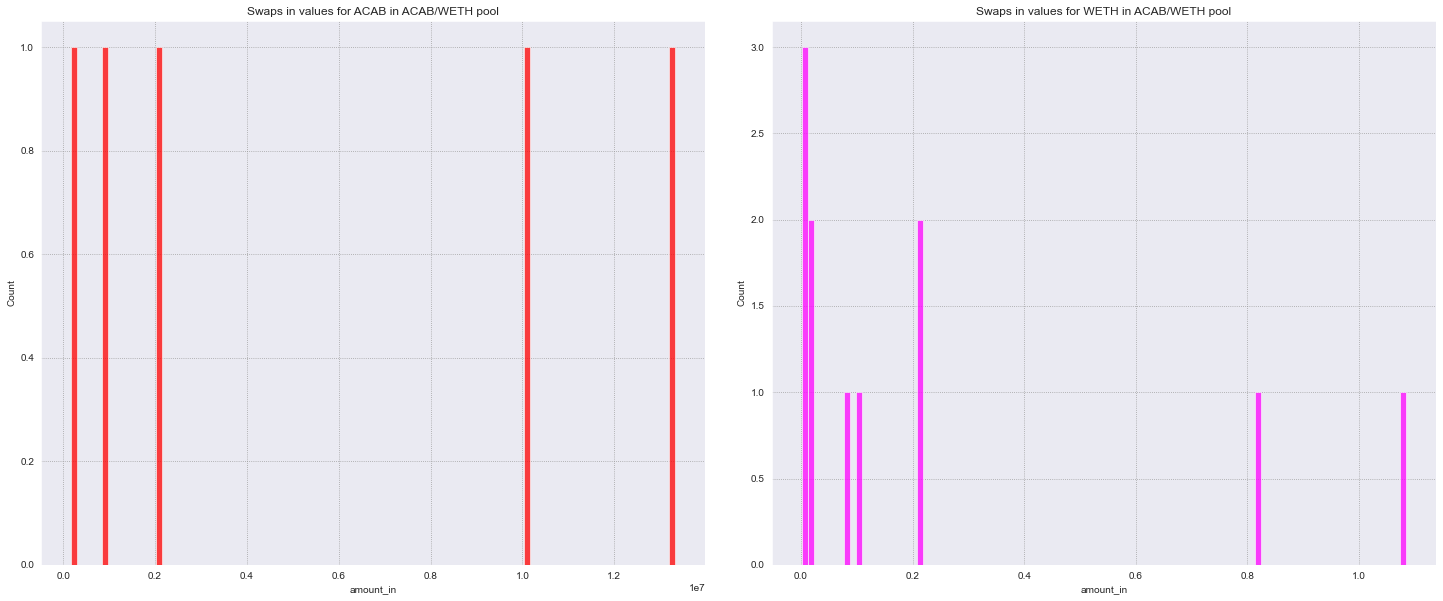

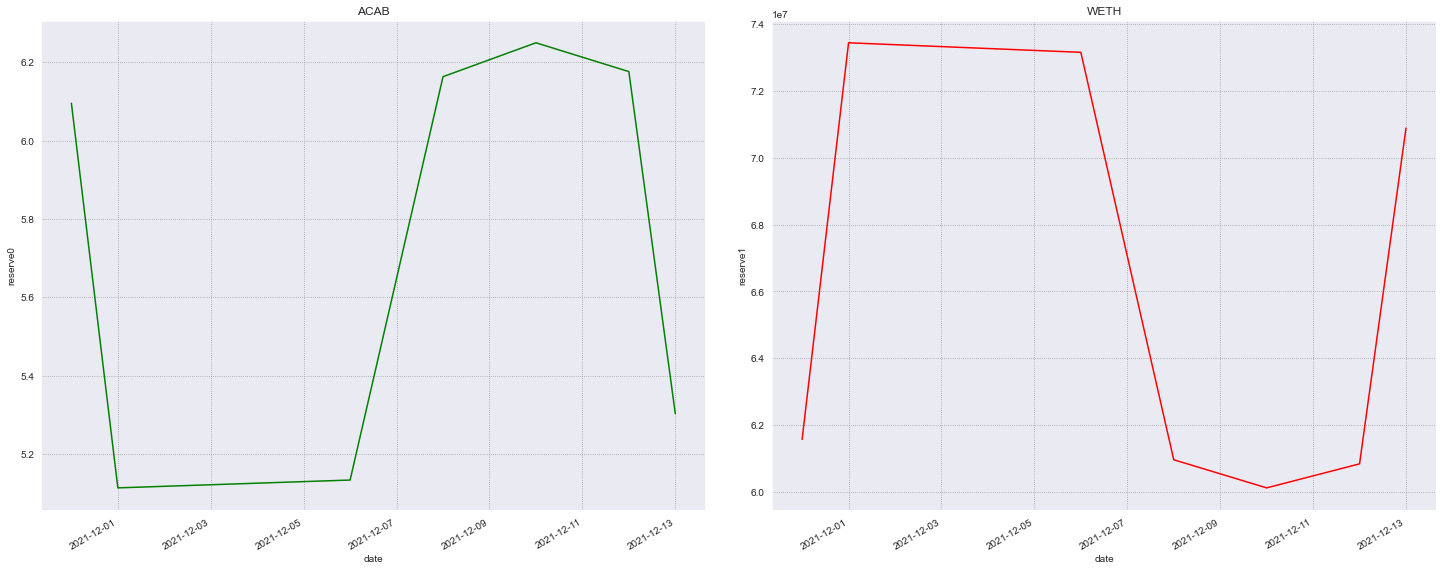

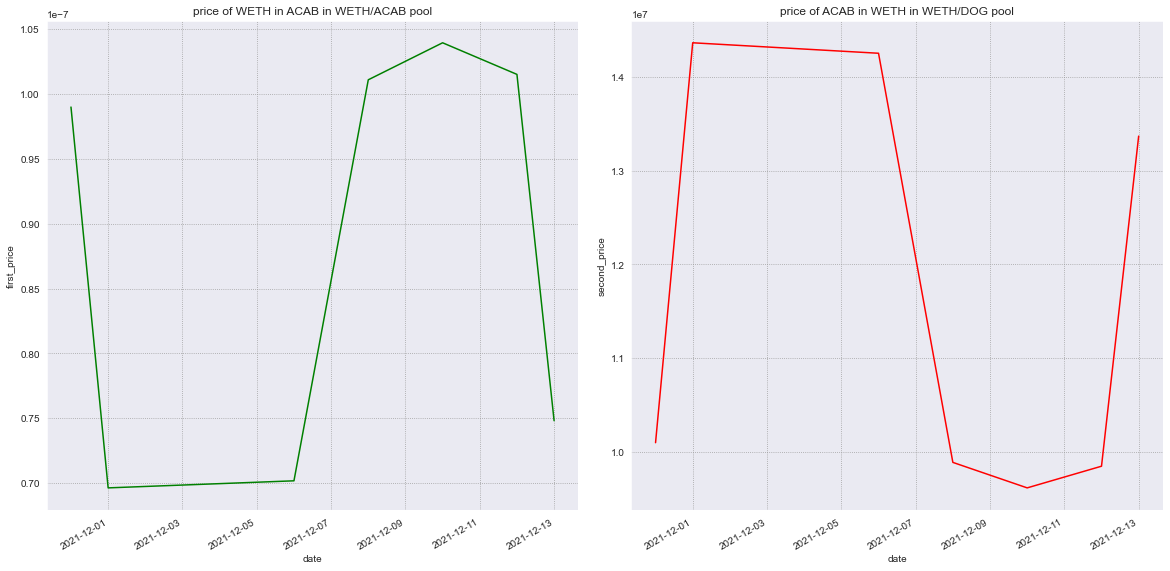

In [29]:
acab_weth_df = get_df_with_swap_prices_and_change_rates(acab_weth_df, 'ACAB', 'WETH')

pyplot_line_swap_prices(acab_weth_df, 'ACAB', 'WETH', xsize=20, ysize=10, wspace=0.1, hspace=0.1)

pyplot_line_swap_change_rate(acab_weth_df, 'ACAB', 'WETH', xsize=20, ysize=10, wspace=0.1, hspace=0.1)

swaps_price_change_rates_moving_averages(acab_weth_df, 'ACAB', 'WETH', 'Moving averages change rates for ACAB',
                                           'Moving averages change rates for WETH', x_size=20, y_size=10, wspace=0.1, hspace=0.1)

show_swaps_amount_in_moving_averages(swaps_df=acab_weth_df[(acab_weth_df.token_in == 'ACAB')], pool_name="ACAB/WETH for ACAB")
show_swaps_amount_in_moving_averages(swaps_df=acab_weth_df[(acab_weth_df.token_in == 'WETH')], pool_name="ACAB/WETH for WETH")

# swapping values histograms
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.histplot(data=acab_weth_df[acab_weth_df.token_in == 'ACAB'], x='timestamp', 
             bins=(acab_weth_df.timestamp[len(acab_weth_df) - 1] - acab_weth_df.timestamp[0]).days, 
             color='red').set_title("Daily count swaps in for ACAB in ACAB/WETH pool")
plt.subplot(1, 2, 2)
sns.histplot(data=acab_weth_df[acab_weth_df.token_in == 'WETH'], x='timestamp', 
             bins=(acab_weth_df.timestamp[len(acab_weth_df) - 1] - acab_weth_df.timestamp[0]).days, 
             color='magenta').set_title("Daily count swaps in for WETH in ACAB/WETH pool")
plt.subplots_adjust(wspace=0.1)
plt.show()

# swapping in values distribution
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.histplot(data=acab_weth_df[acab_weth_df.token_in == 'ACAB'], x='amount_in', bins=100, 
             color='red').set_title("Swaps in values for ACAB in ACAB/WETH pool")
plt.subplot(1, 2, 2)
sns.histplot(data=acab_weth_df[acab_weth_df.token_in == 'WETH'], x='amount_in', bins=100, 
             color='magenta').set_title("Swaps in values for WETH in ACAB/WETH pool")
plt.subplots_adjust(wspace=0.1)
plt.show()

show_reserves_time_distribution(acab_weth_reserves_df, first_token_reserve_name="ACAB", 
                                           second_token_reserve_name="WETH", x=25, y=10, wspace=0.1)

show_reserve_price_distributions(acab_weth_reserves_df, first_token_price_name="price of WETH in ACAB in WETH/ACAB pool", 
                                        second_token_price_name="price of ACAB in WETH in WETH/DOG pool", x=20, y=10, wspace=0.1)